# Document Similarity Calculation

In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load the dataset
with open("/path/to/dataPG_TF-IDF.pkl", "rb") as file:
    label_dataframes = pickle.load(file)
    
# Combine all text data into a single list
combined_texts = []
split_indices = []  # Track document counts per class
for df in label_dataframes.values():
    split_indices.append(len(df))  # Store the number of docs per class
    combined_texts.extend(df['FullText'].fillna(''))  # Add the text
print(len(combined_texts))

51106


In [3]:
# Train a single TF-IDF vectorizer on all data
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
shared_vectorizer = TfidfVectorizer(max_features=10000)  # Limit features if needed
shared_tfidf_matrix = shared_vectorizer.fit_transform(combined_texts)
# Convert to dense array before splitting
split_vectors = np.split(shared_tfidf_matrix.toarray(), np.cumsum(split_indices[:-1]))
# Store shared TF-IDF vectors by class label
shared_vectorized_books = {label: vectors for label, vectors in zip(label_dataframes.keys(), split_vectors)}

In [4]:
combined_texts[0]

'       note  this file combines the first two project gutenberg      files both of which were given the filenumber 1 there are      several duplicate files here there were many updates over      the years  all of the original files are included in the      old subdirectory which may be accessed under the more      files listing in the pg catalog of this file no changes      have been made in these original etexts     welcome to the world of free plain vanilla electronic texts  etexts readable by both humans and by computers since 1971  these etexts prepared by hundreds of volunteers and donations  below you will find the first nine project gutenberg etexts in one file with one header for the entire file  this is to keep the overhead down and in response to requests from gopher site keeper to eliminate as much of the headers as possible  however for legal and financial reasons we must request these headers be left at the beginning of each file that is posted in any general user areas a

In [5]:
with open("/path/to/shared_vectorized_books.pkl", "wb") as file:
    pickle.dump(shared_vectorized_books, file)

In [6]:
with open("/path/to/shared_vectorized_books.pkl", "rb") as file:
    shared_vectorized_books = pickle.load(file)

In [7]:
# Calculate average similarities of TF-IDF vectors of all books in each pair of categories
labels = list(shared_vectorized_books.keys())
pairwise_avg_similarity = {}
pairwise_count = {}
for i, label1 in enumerate(labels):
    vecs1 = shared_vectorized_books[label1]
    ids1 = label_dataframes[label1]['Text#'].tolist()

    for j, label2 in enumerate(labels):
        if j < i:
            continue  # avoid duplicate group comparisons

        vecs2 = shared_vectorized_books[label2]
        ids2 = label_dataframes[label2]['Text#'].tolist()

        # Compute full similarity matrix between two groups
        sim_matrix = cosine_similarity(vecs1, vecs2)

        # Build a mask to exclude invalid pairs
        if label1 == label2:
            # Intra-group: exclude lower triangle and diagonal
            mask = np.triu(np.ones(sim_matrix.shape), k=1).astype(bool)
        else:
            # Inter-group: exclude any identical books (by ID)
            mask = np.array([
                [book1 != book2 for book2 in ids2]
                for book1 in ids1
            ])

        # Apply mask and compute average similarity
        valid_sims = sim_matrix[mask]
        key = tuple(sorted([label1, label2]))
        pairwise_avg_similarity[key] = valid_sims.mean()
        pairwise_count[key] = valid_sims.size
        print(f"{key}: {pairwise_avg_similarity[key]:.4f} (n={pairwise_count[key]})")

('JK', 'JK'): 0.8163 (n=6786)
('BS', 'JK'): 0.7456 (n=73359)
('JK', 'PR'): 0.7497 (n=1158534)
('JK', 'PS'): 0.7296 (n=1363986)
('BX', 'JK'): 0.8232 (n=83655)
('JK', 'PA'): 0.7700 (n=40716)
('JK', 'PE'): 0.7377 (n=28898)
('JK', 'TK'): 0.7000 (n=11934)
('JK', 'PZ'): 0.7352 (n=853749)
('JK', 'QA'): 0.3183 (n=16497)
('HX', 'JK'): 0.8476 (n=13923)
('JK', 'PQ'): 0.7857 (n=166257)
('HV', 'JK'): 0.8418 (n=44343)
('JK', 'NC'): 0.6453 (n=21996)
('JK', 'TL'): 0.7878 (n=12402)
('JK', 'PJ'): 0.8067 (n=13806)
('BR', 'JK'): 0.8337 (n=26442)
('BL', 'JK'): 0.8283 (n=46098)
('AE', 'JK'): 0.8649 (n=16380)
('JK', 'PG'): 0.7524 (n=31824)
('AG', 'JK'): 0.8333 (n=29718)
('JK', 'PT'): 0.7878 (n=91611)
('JK', 'QC'): 0.6633 (n=22113)
('DS', 'JK'): 0.8487 (n=92664)
('DA', 'JK'): 0.8192 (n=199485)
('BJ', 'JK'): 0.8106 (n=29835)
('JK', 'PN'): 0.8017 (n=107172)
('CT', 'JK'): 0.8329 (n=28197)
('JK', 'QH'): 0.7209 (n=76284)
('DP', 'JK'): 0.8546 (n=12402)
('GV', 'JK'): 0.8022 (n=32877)
('BF', 'JK'): 0.8309 (n=47853)
(

('BX', 'PA'): 0.8071 (n=248820)
('BX', 'PE'): 0.7633 (n=176605)
('BX', 'TK'): 0.7118 (n=72930)
('BX', 'PZ'): 0.7833 (n=5217354)
('BX', 'QA'): 0.3247 (n=100815)
('BX', 'HX'): 0.8705 (n=85085)
('BX', 'PQ'): 0.8298 (n=1016015)
('BX', 'HV'): 0.8717 (n=270985)
('BX', 'NC'): 0.6653 (n=134419)
('BX', 'TL'): 0.8029 (n=75790)
('BX', 'PJ'): 0.8531 (n=84370)
('BR', 'BX'): 0.8697 (n=161588)
('BL', 'BX'): 0.8560 (n=281710)
('AE', 'BX'): 0.8788 (n=100100)
('BX', 'PG'): 0.8037 (n=194480)
('AG', 'BX'): 0.8532 (n=181610)
('BX', 'PT'): 0.8382 (n=559845)
('BX', 'QC'): 0.6735 (n=135135)
('BX', 'DS'): 0.8733 (n=566280)
('BX', 'DA'): 0.8493 (n=1219070)
('BJ', 'BX'): 0.8458 (n=182324)
('BX', 'PN'): 0.8390 (n=654940)
('BX', 'CT'): 0.8745 (n=172310)
('BX', 'QH'): 0.7361 (n=466180)
('BX', 'DP'): 0.8777 (n=75790)
('BX', 'GV'): 0.8258 (n=200915)
('BF', 'BX'): 0.8593 (n=292435)
('BX', 'LB'): 0.8694 (n=116545)
('BX', 'ND'): 0.8526 (n=178035)
('BX', 'QL'): 0.8151 (n=461890)
('BX', 'DU'): 0.8757 (n=148720)
('BV', 'BX

('LB', 'PZ'): 0.7902 (n=1189408)
('ND', 'PZ'): 0.7697 (n=1816953)
('PZ', 'QL'): 0.7421 (n=4713848)
('DU', 'PZ'): 0.8093 (n=1517773)
('BV', 'PZ'): 0.7276 (n=4801418)
('DG', 'PZ'): 0.7924 (n=1816952)
('HQ', 'PZ'): 0.7801 (n=2670701)
('ML', 'PZ'): 0.7803 (n=2254771)
('DT', 'PZ'): 0.8149 (n=2736371)
('PZ', 'TX'): 0.6226 (n=2984472)
('AP', 'PZ'): 0.8291 (n=17716977)
('BT', 'PZ'): 0.7810 (n=1393727)
('PZ', 'QK'): 0.6954 (n=1371835)
('HD', 'PZ'): 0.7378 (n=1335351)
('DC', 'PZ'): 0.8008 (n=3998755)
('DK', 'PZ'): 0.7890 (n=824557)
('PZ', 'SK'): 0.8070 (n=846452)
('PZ', 'QE'): 0.7281 (n=1189411)
('PZ', 'RC'): 0.7505 (n=1415618)
('DD', 'PZ'): 0.8098 (n=744292)
('PZ', 'QB'): 0.7166 (n=1123738)
('GR', 'PZ'): 0.8021 (n=1846124)
('PZ', 'SB'): 0.7492 (n=1714795)
('BP', 'PZ'): 0.7713 (n=1006986)
('GN', 'PZ'): 0.7662 (n=926718)
('PZ', 'QP'): 0.3785 (n=1058065)
('HE', 'PZ'): 0.7159 (n=1145629)
('PZ', 'SF'): 0.7606 (n=1663715)
('DH', 'PZ'): 0.8072 (n=970501)
('PZ', 'RA'): 0.7725 (n=846452)
('PZ', 'TS'): 0

('DA', 'NC'): 0.6701 (n=320517)
('BJ', 'NC'): 0.6535 (n=47940)
('NC', 'PN'): 0.6606 (n=172207)
('CT', 'NC'): 0.6792 (n=45308)
('NC', 'QH'): 0.5851 (n=122576)
('DP', 'NC'): 0.7025 (n=19928)
('GV', 'NC'): 0.6619 (n=52828)
('BF', 'NC'): 0.6720 (n=76892)
('LB', 'NC'): 0.6830 (n=30644)
('NC', 'ND'): 0.6809 (n=46812)
('NC', 'QL'): 0.6522 (n=121447)
('DU', 'NC'): 0.6899 (n=39104)
('BV', 'NC'): 0.6168 (n=123704)
('DG', 'NC'): 0.6891 (n=46809)
('HQ', 'NC'): 0.6685 (n=68808)
('ML', 'NC'): 0.6699 (n=58092)
('DT', 'NC'): 0.7005 (n=70500)
('NC', 'TX'): 0.5387 (n=76892)
('AP', 'NC'): 0.6981 (n=456464)
('BT', 'NC'): 0.6694 (n=35908)
('NC', 'QK'): 0.6279 (n=35344)
('HD', 'NC'): 0.6412 (n=34404)
('DC', 'NC'): 0.6859 (n=103023)
('DK', 'NC'): 0.6730 (n=21244)
('NC', 'SK'): 0.6894 (n=21808)
('NC', 'QE'): 0.6658 (n=30644)
('NC', 'RC'): 0.6582 (n=36472)
('DD', 'NC'): 0.6923 (n=19176)
('NC', 'QB'): 0.6401 (n=28952)
('GR', 'NC'): 0.6613 (n=47563)
('NC', 'SB'): 0.6619 (n=44180)
('BP', 'NC'): 0.6750 (n=25944)
(

('AE', 'AP'): 0.9091 (n=339920)
('AE', 'BT'): 0.8826 (n=26740)
('AE', 'QK'): 0.8332 (n=26320)
('AE', 'HD'): 0.8535 (n=25620)
('AE', 'DC'): 0.9103 (n=76720)
('AE', 'DK'): 0.8927 (n=15820)
('AE', 'SK'): 0.9025 (n=16240)
('AE', 'QE'): 0.9011 (n=22820)
('AE', 'RC'): 0.8792 (n=27160)
('AE', 'DD'): 0.9152 (n=14280)
('AE', 'QB'): 0.8542 (n=21560)
('AE', 'GR'): 0.8602 (n=35420)
('AE', 'SB'): 0.8745 (n=32900)
('AE', 'BP'): 0.9012 (n=19320)
('AE', 'GN'): 0.9142 (n=17780)
('AE', 'QP'): 0.4532 (n=20300)
('AE', 'HE'): 0.8443 (n=21980)
('AE', 'SF'): 0.8736 (n=31920)
('AE', 'DH'): 0.9188 (n=18620)
('AE', 'RA'): 0.9112 (n=16240)
('AE', 'TS'): 0.8576 (n=17920)
('AE', 'TT'): 0.6763 (n=24640)
('AE', 'NK'): 0.8905 (n=22120)
('PG', 'PG'): 0.8018 (n=36856)
('AG', 'PG'): 0.7765 (n=69088)
('PG', 'PT'): 0.8325 (n=212976)
('PG', 'QC'): 0.6136 (n=51408)
('DS', 'PG'): 0.8106 (n=215424)
('DA', 'PG'): 0.7936 (n=463760)
('BJ', 'PG'): 0.7963 (n=69360)
('PG', 'PN'): 0.8022 (n=249152)
('CT', 'PG'): 0.8344 (n=65552)
('P

('DA', 'TX'): 0.6783 (n=697344)
('AP', 'DA'): 0.8818 (n=4139734)
('BT', 'DA'): 0.8489 (n=325655)
('DA', 'QK'): 0.7774 (n=320540)
('DA', 'HD'): 0.8117 (n=312015)
('DA', 'DC'): 0.8725 (n=934332)
('DA', 'DK'): 0.8562 (n=192665)
('DA', 'SK'): 0.8666 (n=197780)
('DA', 'QE'): 0.8324 (n=277915)
('DA', 'RC'): 0.8323 (n=330770)
('DA', 'DD'): 0.8787 (n=173909)
('DA', 'QB'): 0.8014 (n=262570)
('DA', 'GR'): 0.8381 (n=431362)
('DA', 'SB'): 0.8265 (n=400675)
('BP', 'DA'): 0.8546 (n=235290)
('DA', 'GN'): 0.8570 (n=216535)
('DA', 'QP'): 0.4237 (n=247225)
('DA', 'HE'): 0.7982 (n=267683)
('DA', 'SF'): 0.8308 (n=388740)
('DA', 'DH'): 0.8816 (n=226765)
('DA', 'RA'): 0.8607 (n=197780)
('DA', 'TS'): 0.8023 (n=218240)
('DA', 'TT'): 0.6364 (n=300080)
('DA', 'NK'): 0.8305 (n=269390)
('BJ', 'BJ'): 0.8583 (n=32385)
('BJ', 'PN'): 0.8301 (n=233578)
('BJ', 'CT'): 0.8532 (n=61455)
('BJ', 'QH'): 0.7247 (n=166260)
('BJ', 'DP'): 0.8521 (n=27030)
('BJ', 'GV'): 0.8191 (n=71654)
('BF', 'BJ'): 0.8526 (n=104294)
('BJ', 'LB'

('BF', 'HD'): 0.8221 (n=74847)
('BF', 'DC'): 0.8728 (n=224131)
('BF', 'DK'): 0.8595 (n=46217)
('BF', 'SK'): 0.8776 (n=47444)
('BF', 'QE'): 0.8459 (n=66667)
('BF', 'RC'): 0.8492 (n=79343)
('BF', 'DD'): 0.8818 (n=41718)
('BF', 'QB'): 0.8157 (n=62986)
('BF', 'GR'): 0.8394 (n=103476)
('BF', 'SB'): 0.8454 (n=96115)
('BF', 'BP'): 0.8705 (n=56440)
('BF', 'GN'): 0.8691 (n=51941)
('BF', 'QP'): 0.4335 (n=59303)
('BF', 'HE'): 0.8028 (n=64213)
('BF', 'SF'): 0.8471 (n=93252)
('BF', 'DH'): 0.8765 (n=54397)
('BF', 'RA'): 0.8794 (n=47443)
('BF', 'TS'): 0.8186 (n=52352)
('BF', 'TT'): 0.6485 (n=71984)
('BF', 'NK'): 0.8416 (n=64622)
('LB', 'LB'): 0.8979 (n=13203)
('LB', 'ND'): 0.8685 (n=40587)
('LB', 'QL'): 0.8383 (n=105298)
('DU', 'LB'): 0.8910 (n=33904)
('BV', 'LB'): 0.8084 (n=107254)
('DG', 'LB'): 0.8840 (n=40587)
('HQ', 'LB'): 0.8810 (n=59656)
('LB', 'ML'): 0.8620 (n=50367)
('DT', 'LB'): 0.9043 (n=61125)
('LB', 'TX'): 0.7045 (n=66667)
('AP', 'LB'): 0.9023 (n=395764)
('BT', 'LB'): 0.8771 (n=31133)
('L

('DT', 'SK'): 0.9156 (n=43499)
('DT', 'QE'): 0.8794 (n=61125)
('DT', 'RC'): 0.8746 (n=72750)
('DD', 'DT'): 0.9208 (n=38250)
('DT', 'QB'): 0.8465 (n=57750)
('DT', 'GR'): 0.8801 (n=94875)
('DT', 'SB'): 0.8724 (n=88125)
('BP', 'DT'): 0.8973 (n=51750)
('DT', 'GN'): 0.9054 (n=47624)
('DT', 'QP'): 0.4478 (n=54375)
('DT', 'HE'): 0.8397 (n=58875)
('DT', 'SF'): 0.8770 (n=85500)
('DH', 'DT'): 0.9240 (n=49875)
('DT', 'RA'): 0.9054 (n=43500)
('DT', 'TS'): 0.8481 (n=48000)
('DT', 'TT'): 0.6721 (n=66000)
('DT', 'NK'): 0.8729 (n=59250)
('TX', 'TX'): 0.6833 (n=83436)
('AP', 'TX'): 0.7129 (n=993051)
('BT', 'TX'): 0.6849 (n=78119)
('QK', 'TX'): 0.6560 (n=76892)
('HD', 'TX'): 0.6605 (n=74847)
('DC', 'TX'): 0.6874 (n=224132)
('DK', 'TX'): 0.6833 (n=46217)
('SK', 'TX'): 0.7125 (n=47444)
('QE', 'TX'): 0.6796 (n=66667)
('RC', 'TX'): 0.6864 (n=79346)
('DD', 'TX'): 0.7008 (n=41718)
('QB', 'TX'): 0.6442 (n=62986)
('GR', 'TX'): 0.6679 (n=103477)
('SB', 'TX'): 0.6978 (n=96115)
('BP', 'TX'): 0.6910 (n=56442)
('GN'

('BP', 'TT'): 0.6487 (n=24288)
('BP', 'NK'): 0.8472 (n=21804)
('GN', 'GN'): 0.8908 (n=8001)
('GN', 'QP'): 0.4414 (n=18415)
('GN', 'HE'): 0.8169 (n=19939)
('GN', 'SF'): 0.8554 (n=28956)
('DH', 'GN'): 0.8865 (n=16891)
('GN', 'RA'): 0.8875 (n=14732)
('GN', 'TS'): 0.8353 (n=16256)
('GN', 'TT'): 0.6602 (n=22352)
('GN', 'NK'): 0.8607 (n=20065)
('QP', 'QP'): 0.2206 (n=10440)
('HE', 'QP'): 0.4059 (n=22765)
('QP', 'SF'): 0.4281 (n=33059)
('DH', 'QP'): 0.4373 (n=19285)
('QP', 'RA'): 0.4445 (n=16817)
('QP', 'TS'): 0.4181 (n=18560)
('QP', 'TT'): 0.3300 (n=25520)
('NK', 'QP'): 0.4275 (n=22910)
('HE', 'HE'): 0.7717 (n=12246)
('HE', 'SF'): 0.7918 (n=35796)
('DH', 'HE'): 0.8282 (n=20881)
('HE', 'RA'): 0.8204 (n=18212)
('HE', 'TS'): 0.7712 (n=20096)
('HE', 'TT'): 0.6123 (n=27632)
('HE', 'NK'): 0.7920 (n=24806)
('SF', 'SF'): 0.8496 (n=25878)
('DH', 'SF'): 0.8553 (n=30324)
('RA', 'SF'): 0.8662 (n=26448)
('SF', 'TS'): 0.8157 (n=29184)
('SF', 'TT'): 0.6518 (n=40128)
('NK', 'SF'): 0.8306 (n=36024)
('DH', 'D

In [8]:
records = []
for key in pairwise_avg_similarity:
    label1, label2 = key
    avg_sim = pairwise_avg_similarity[key]
    count = pairwise_count[key]
    records.append({
        'Category 1': label1,
        'Category 2': label2,
        'Average Similarity': avg_sim,
        'Pair Count': count
    })
category_similarities = pd.DataFrame(records)
category_similarities.to_csv("data/category_similarity.csv", index=False)
category_similarities.sort_values(by='Average Similarity', ascending=False)

,Category 1,Category 2,Average Similarity,Pair Count
1017,AE,AE,0.958686,9730
1820,DT,DT,0.940211,70125
2130,DH,DH,0.935424,8778
1028,AE,DP,0.933323,14840
1479,DP,DP,0.930730,5565
...,...,...,...,...
553,NC,QA,0.258778,26508
603,QA,TT,0.252365,24816
2109,QP,QP,0.220589,10440
597,QA,QP,0.167613,20445


In [9]:
category_similarities = pd.read_csv("data/category_similarity.csv")
category_similarities

,Category 1,Category 2,Average Similarity,Pair Count
0,JK,JK,0.816298,6786
1,BS,JK,0.745611,73359
2,JK,PR,0.749703,1158534
3,JK,PS,0.729638,1363986
4,BX,JK,0.823222,83655
...,...,...,...,...
2140,TS,TT,0.640203,22528
2141,NK,TS,0.816470,20222
2142,TT,TT,0.560927,15400
2143,NK,TT,0.651941,27805


In [10]:
# For multi-category books, calculate average similarities with them and books in each of their cateogries
from collections import defaultdict
book_to_categories = defaultdict(set)
for label, df in label_dataframes.items():
    for book_id in df['Text#']:
        book_to_categories[book_id].add(label)
# Filter to multi-category books        
multi_category_books = {book_id: cats for book_id, cats in book_to_categories.items() if len(cats) > 1}
print(len(multi_category_books))

1627


In [11]:
similarity_within_class = {}
book_indices = {}
for label in labels:
    vectors = shared_vectorized_books[label]
    sim_matrix = cosine_similarity(vectors)
    similarity_within_class[label] = sim_matrix
    # Map book_id to row index in sim_matrix for fast lookup
    book_indices[label] = {book_id: i for i, book_id in enumerate(label_dataframes[label]['Text#'])}

book_similarity_across_categories = {}
for book_id, categories in multi_category_books.items():
    book_similarity_across_categories[book_id] = {}
    for label in categories:
        index_map = book_indices[label]
        sim_matrix = similarity_within_class[label]
        idx = index_map[book_id]
        sims = sim_matrix[idx]  # similarity scores to all books in this class
        avg_sim = (np.sum(sims) - sims[idx]) / (len(sims) - 1)
        book_similarity_across_categories[book_id][label] = avg_sim

In [12]:
with open("data/multiple_categories_book_similarity.pkl", "wb") as file:
    pickle.dump(book_similarity_across_categories, file)

In [13]:
with open("data/multiple_categories_book_similarity.pkl", "rb") as file:
    multiple_categories_book_similarity = pickle.load(file)
multiple_categories_book_similarity

{6158: {'PE': 0.8148576520859966, 'JK': 0.8713774706278078},
 33584: {'HQ': 0.9158728867860864, 'JK': 0.863727183497687},
 51861: {'HQ': 0.854149499048908, 'JK': 0.7971106259978789},
 52634: {'JK': 0.8721011912126342, 'HD': 0.8658134659478617},
 58644: {'DC': 0.7847157731443029, 'JK': 0.7519057498899188},
 73404: {'HQ': 0.9119137693283038, 'JK': 0.8703016293925018},
 4598: {'BS': 0.8022592402322951, 'QH': 0.7893393436242001},
 9782: {'BS': 0.8322298855150769, 'HQ': 0.9198733593629438},
 9783: {'BS': 0.8367842302381001, 'HQ': 0.9221032194450396},
 9880: {'BS': 0.8415358820454927, 'HQ': 0.9154747651881917},
 10380: {'BS': 0.8090497243025464, 'PZ': 0.825271107089681},
 22162: {'BS': 0.7990755868012429, 'PZ': 0.8421326500679884},
 25486: {'BS': 0.7394161204286944, 'PZ': 0.7935662034428069},
 26094: {'BS': 0.8151554137116026, 'PR': 0.8470127857997989},
 36584: {'BS': 0.6284842465467021, 'PZ': 0.6579660622421831},
 36614: {'BS': 0.6925692132481814, 'PZ': 0.729837751306918},
 36767: {'BS': 0.

# Cross Category Similarities Analysis

## Analysis 1: Within Class Similarities

In [14]:
# Get the main category from double digit categories
def get_main_category(code):
    return code[0]
category_similarities['Main Category 1'] = category_similarities['Category 1'].apply(get_main_category)
category_similarities['Main Category 2'] = category_similarities['Category 2'].apply(get_main_category)

# Within-subcategory similarities (AA-AA)
within_subcategory_rows = category_similarities[category_similarities['Category 1'] == category_similarities['Category 2']].copy()
within_subcategory_rows['Category'] = within_subcategory_rows['Category 1']
within_subcategory_rows['Main Category'] = within_subcategory_rows['Category'].apply(get_main_category)
within_subcategory_rows['Type'] = 'Within Subcategory'

# Main-category average similarity (average of AA–AA, AA-AB...)
main_category_avgs = []
for main_category in sorted(set(category_similarities['Main Category 1']).union(category_similarities['Main Category 2'])):
    subset = category_similarities[
        (category_similarities['Main Category 1'] == main_category) & 
        (category_similarities['Main Category 2'] == main_category)
    ].copy()
    total_pairs = subset['Pair Count'].sum()
    weighted_sum = (subset['Average Similarity'] * subset['Pair Count']).sum()
    avg_sim = weighted_sum / total_pairs
    main_category_avgs.append({
        'Category': main_category,
        'Main Category': main_category,
        'Average Similarity': avg_sim,
        'Type': 'Main Category Average'
    })
main_category_df = pd.DataFrame(main_category_avgs)

category_average_data = pd.concat([
    within_subcategory_rows[['Category', 'Main Category', 'Average Similarity', 'Type']],
    main_category_df[['Category', 'Main Category', 'Average Similarity', 'Type']]
], ignore_index=True)

pd.set_option("display.max_rows", 100)
category_average_data.sort_values(by = 'Category')

,Category,Main Category,Average Similarity,Type
65,A,A,0.918431,Main Category Average
18,AE,A,0.958686,Within Subcategory
20,AG,A,0.894024,Within Subcategory
42,AP,A,0.927520,Within Subcategory
66,B,B,0.814133,Main Category Average
31,BF,B,0.869295,Within Subcategory
25,BJ,B,0.858331,Within Subcategory
17,BL,B,0.863517,Within Subcategory
55,BP,B,0.885309,Within Subcategory
16,BR,B,0.880271,Within Subcategory


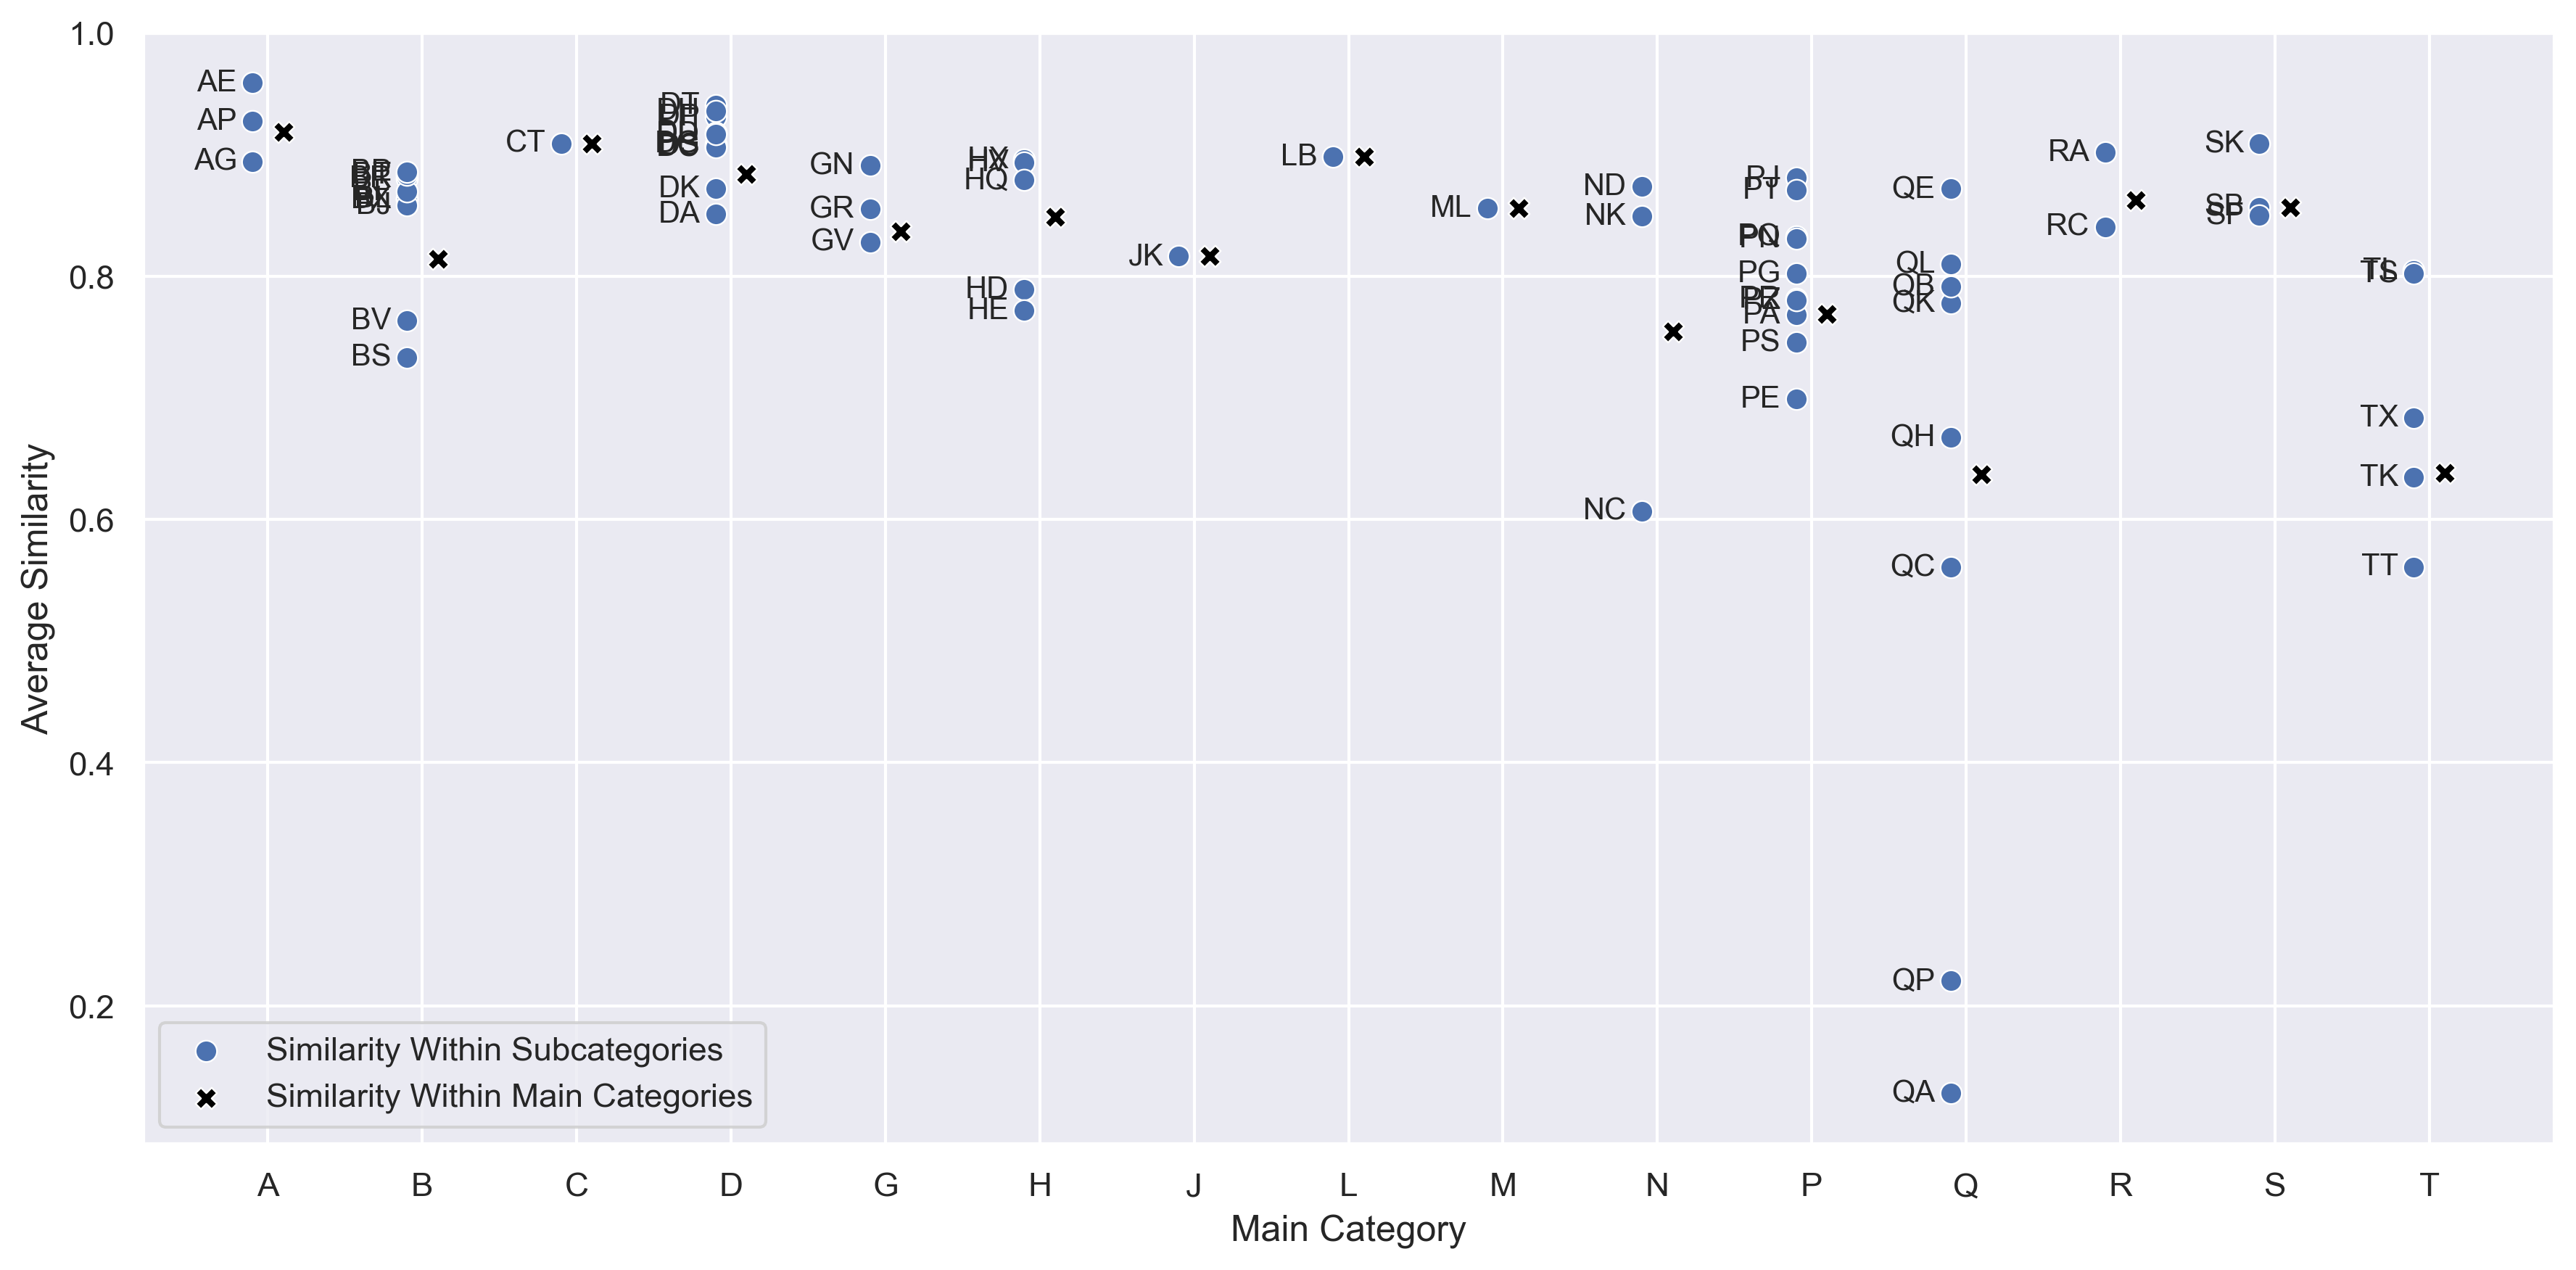

In [15]:
# Visualize similarities within each subcategory and within each main category
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
mpl.rcParams['figure.dpi'] = 300

sorted_main_classes = sorted(set(main_category_df['Main Category']))
# Create a numeric position for each category (shared X-axis)
x_pos_map = {cat: i for i, cat in enumerate(sorted_main_classes)}
within_subcategory_rows['x_pos'] = within_subcategory_rows['Main Category'].map(x_pos_map)
main_category_df['x_pos'] = main_category_df['Main Category'].map(x_pos_map)

# Shift x-axis positions slightly to separate the two groups visually
within_subcategory_rows['x_pos'] -= 0.1
main_category_df['x_pos'] += 0.1

# Scatterplot for Subclasses
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=within_subcategory_rows,
    x='x_pos',
    y='Average Similarity',
    s = 50,
    label='Similarity Within Subcategories',
)

# Scatterplot for Main Classes
sns.scatterplot(
    data=main_category_df,
    x='x_pos',
    y='Average Similarity',
    marker='X',
    color='black',
    s = 50,
    label='Similarity Within Main Categories'
)

# Add annotations for each category (will be updated later to keep categories to be highlighted only)
for _, row in within_subcategory_rows.iterrows():
    plt.text(
        row['x_pos'] - 0.1,                     
        row['Average Similarity'],
        row['Category'],  
        fontsize=10,
        ha='right',
        va='center'
    )
    
plt.xticks(ticks=list(x_pos_map.values()), labels=list(x_pos_map.keys()))
plt.xlabel("Main Category")
plt.ylabel("Average Similarity")
plt.legend(loc='lower left', title='')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

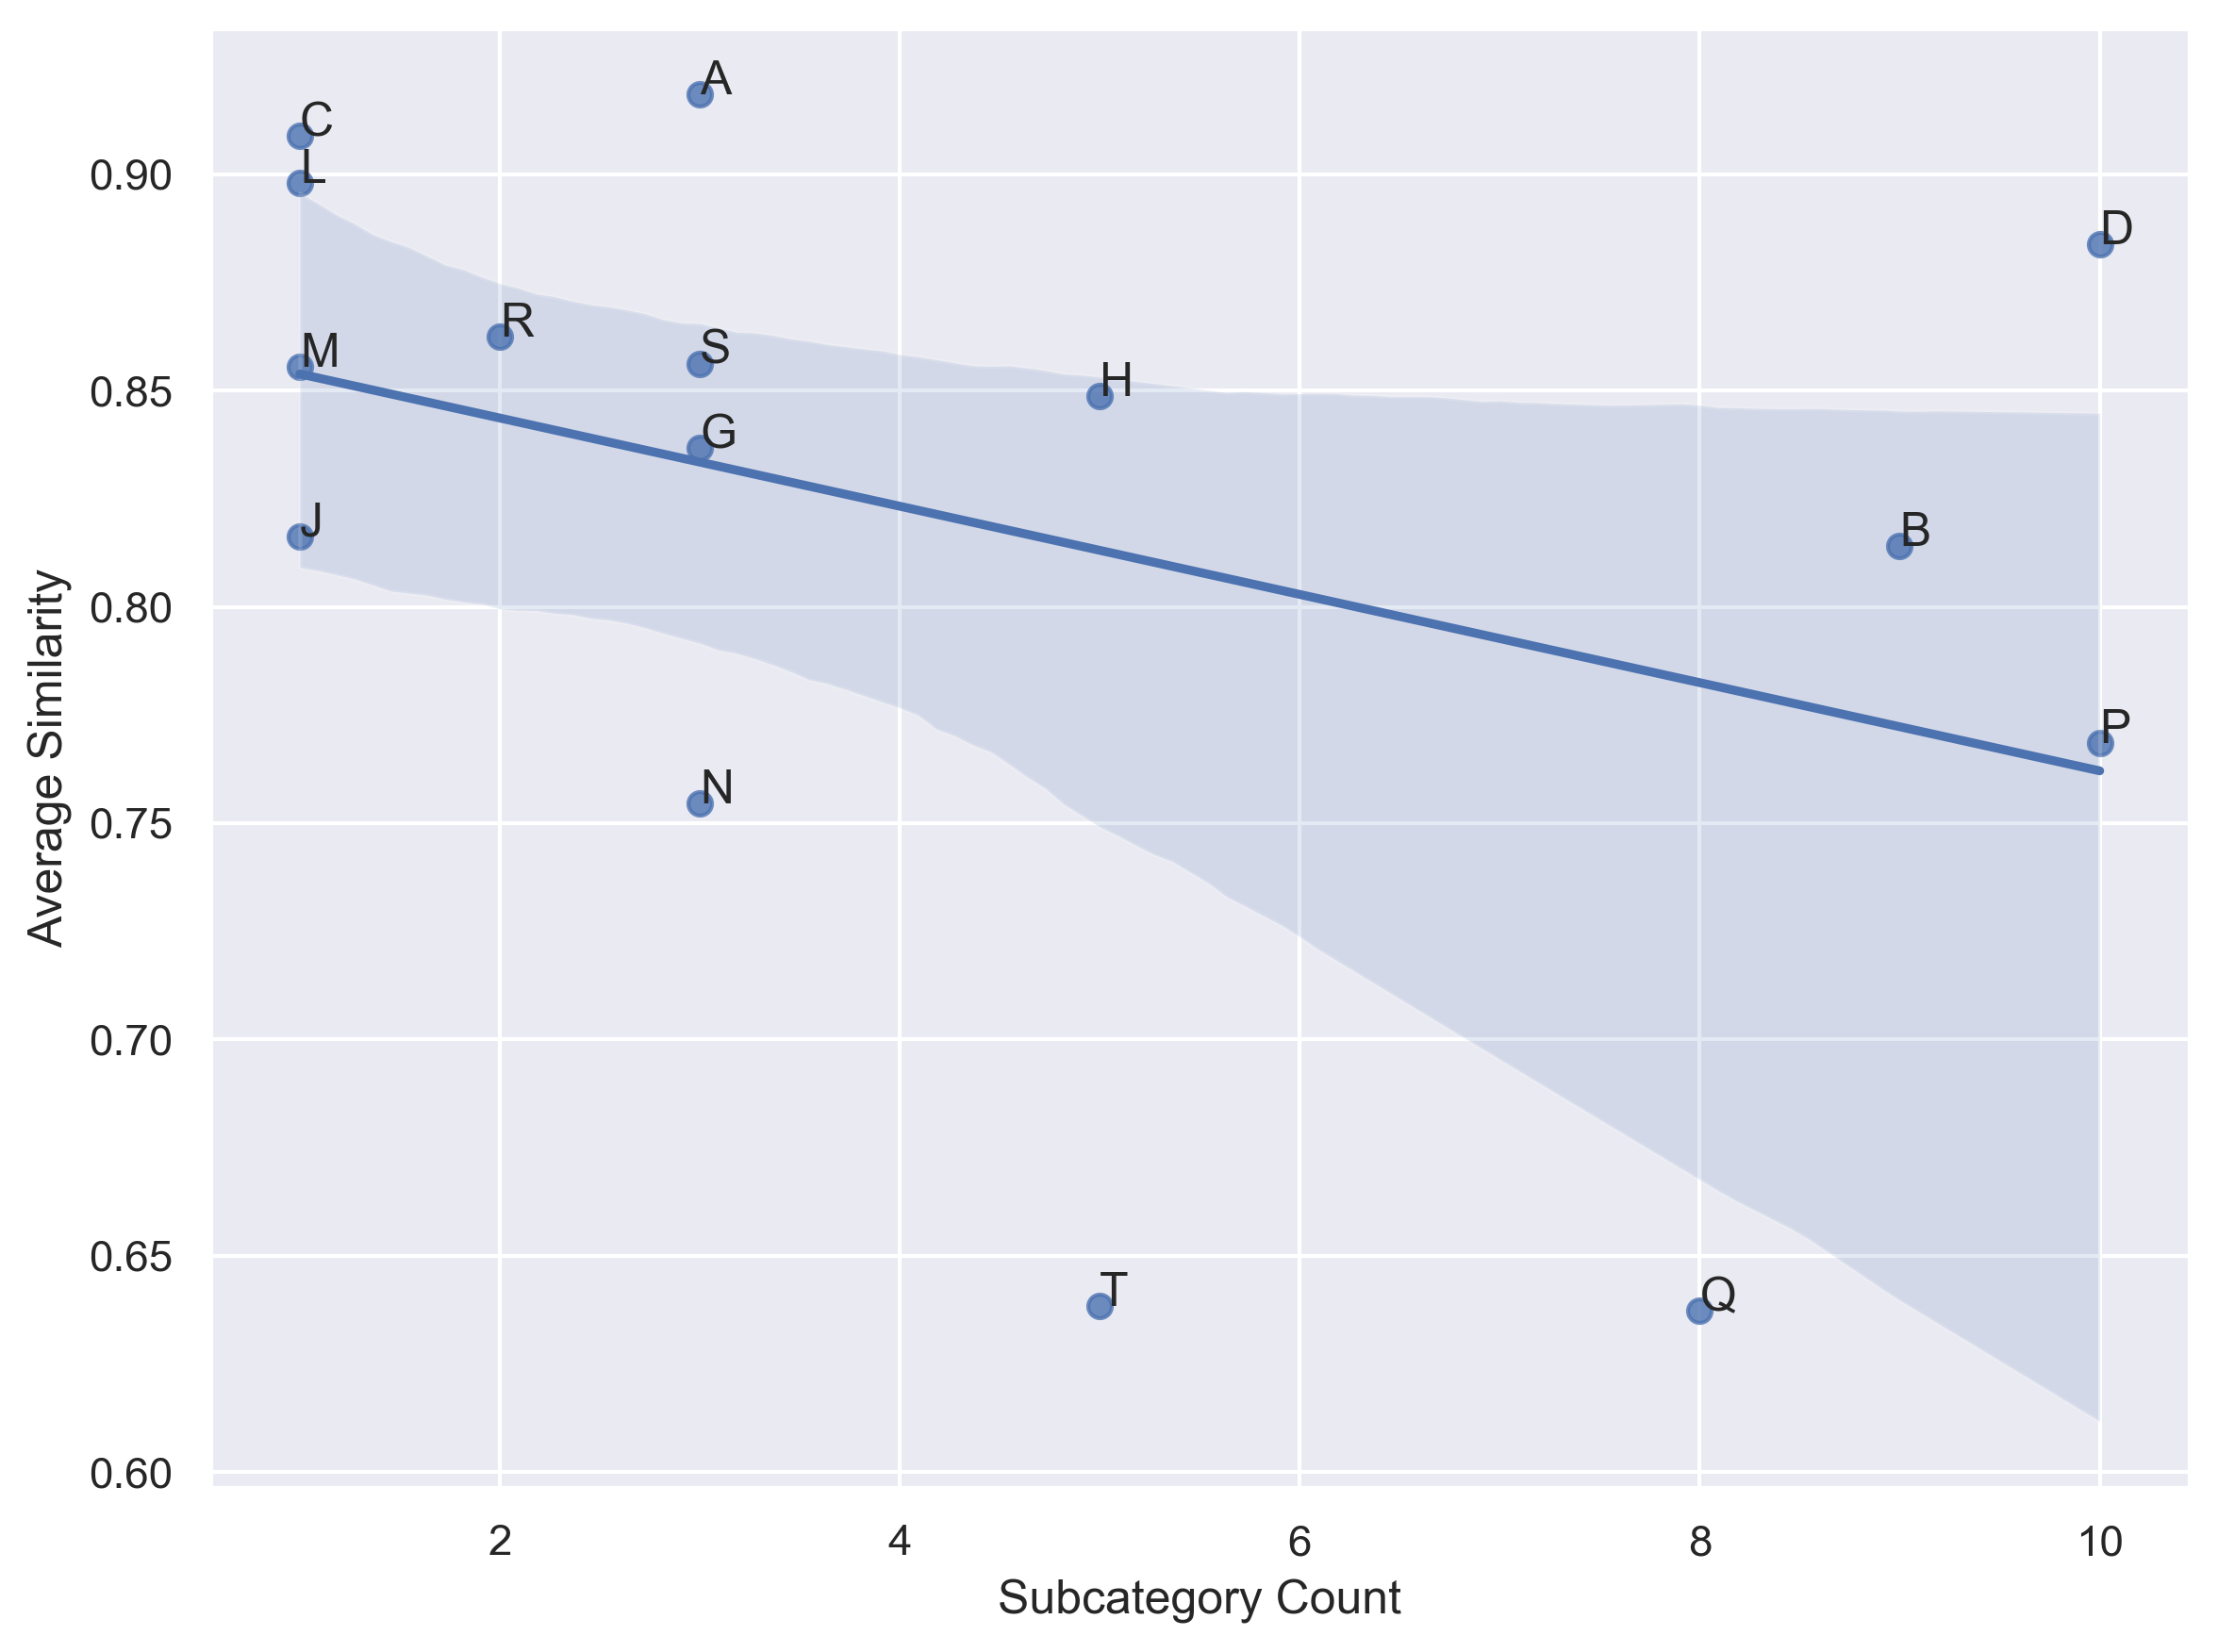

Pearson correlation: r = -0.392, p = 0.149


In [16]:
# Correlation between number of subcategories in each main category AND main class similarity
from scipy.stats import pearsonr
subcategory_counts = within_subcategory_rows.groupby('Main Category')['Category 1'].nunique().reset_index()
subcategory_counts.columns = ['Main Category', 'Subcategory Count']
main_category_df = pd.merge(main_category_df, subcategory_counts, on='Main Category')

plt.figure(figsize=(8, 6))
sns.regplot(data=main_category_df, x='Subcategory Count', y='Average Similarity')
for _, row in main_category_df.iterrows():
    plt.text(row['Subcategory Count'], row['Average Similarity'], row['Main Category'])
plt.grid(True)
plt.tight_layout()
plt.show()

pearson_corr, pearson_p = pearsonr(main_category_df['Subcategory Count'], main_category_df['Average Similarity'])
print(f"Pearson correlation: r = {pearson_corr:.3f}, p = {pearson_p:.3f}")

## Analysis 2: Similarity Across Subcategory and Main Category Boundaries

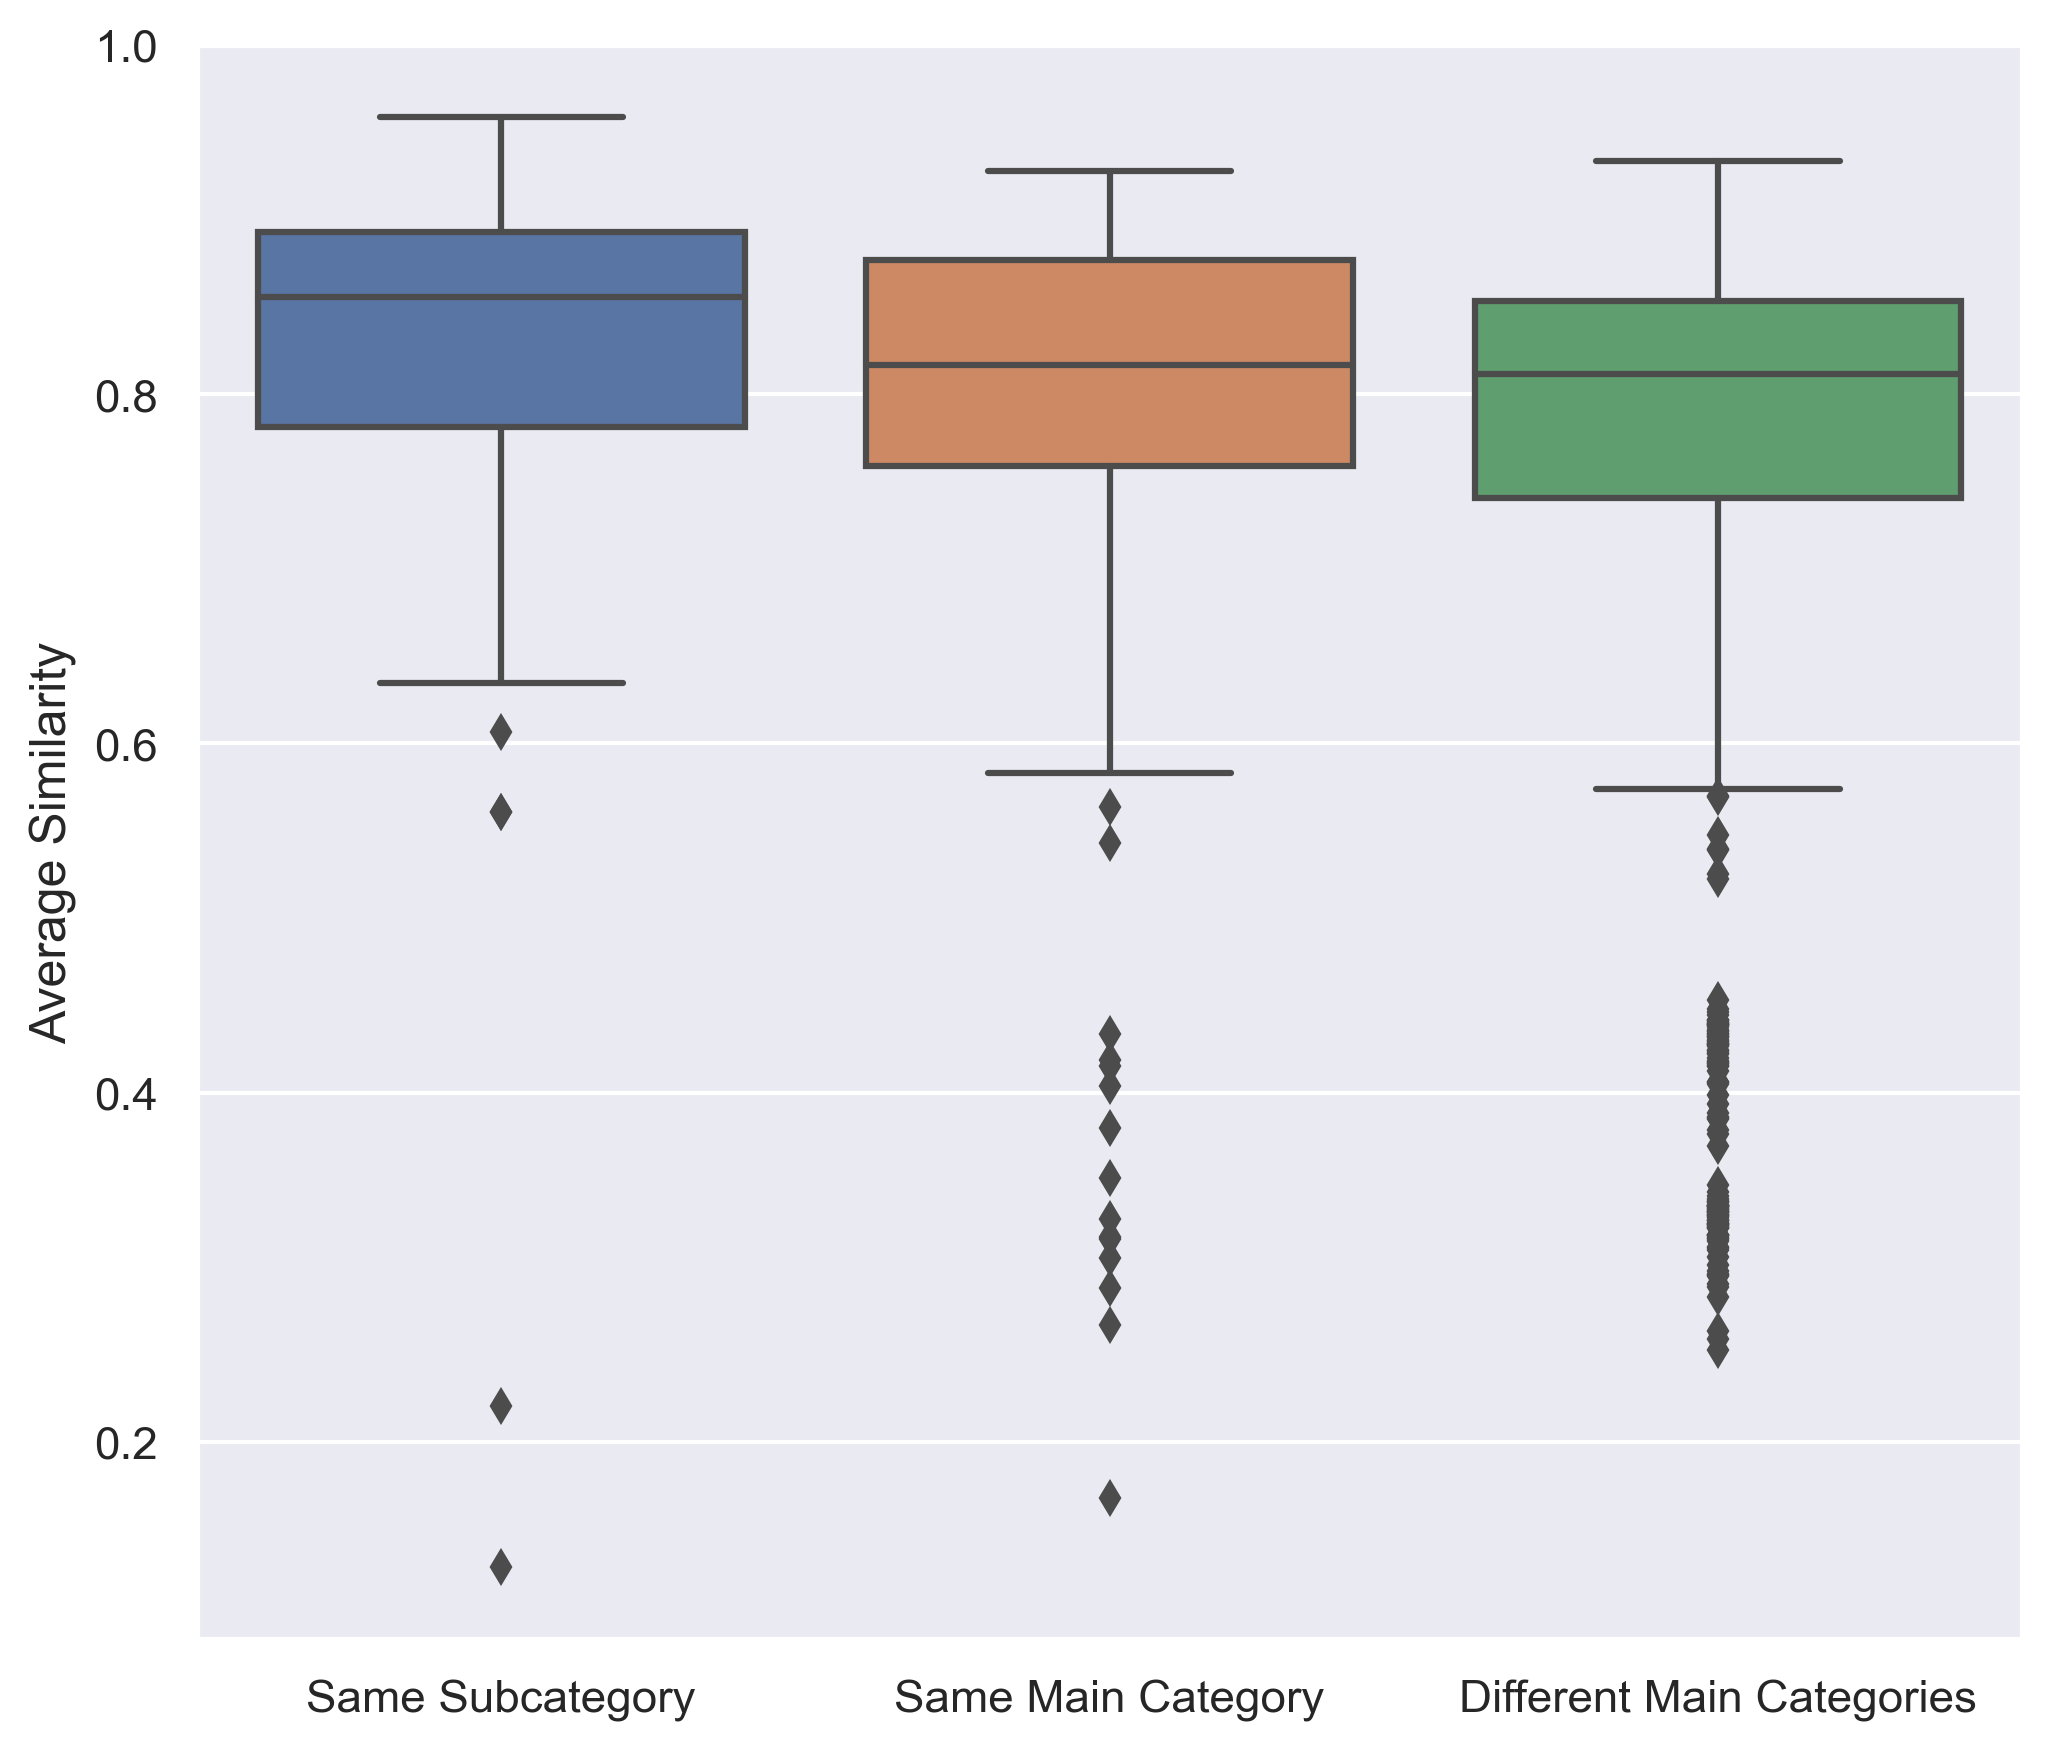

In [17]:
def classify_relationship(row):
    if row['Category 1'] == row['Category 2']:
        return 'Same Subcategory'
    elif row['Main Category 1'] == row['Main Category 2']:
        return 'Same Main Category'
    else:
        return 'Different Main Categories'
category_similarities['Relationship Type'] = category_similarities.apply(classify_relationship, axis=1)

custom_order = ['Same Subcategory', 'Same Main Category', 'Different Main Categories']
plt.figure(figsize=(7, 6))
sns.boxplot(data=category_similarities, x='Relationship Type', y='Average Similarity', order=custom_order)

plt.xlabel("")
plt.ylabel("Average Similarity")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
# (AA-AA, AB-AB)
# (AA-AB, AA-AC)
# (AB-CD)

In [18]:
# Check if there are statistically significant differences among groups
from scipy.stats import kruskal, mannwhitneyu
import itertools

grouped = category_similarities.groupby('Relationship Type')['Average Similarity']
groups = [grouped.get_group(g) for g in custom_order]

# Kruskal-Wallis test
H, p_kruskal = kruskal(*groups)
print(f"Kruskal-Wallis test: H = {H:.3f}, p = {p_kruskal:.3f}")

# Pairwise Mann-Whitney U tests (with Bonferroni correction)
print("\nPairwise Mann-Whitney U tests (Bonferroni-adjusted p-values):")
comparisons = list(itertools.combinations(custom_order, 2))
for a, b in comparisons:
    group1 = grouped.get_group(a)
    group2 = grouped.get_group(b)
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    p_adj = min(p * len(comparisons), 1.0)  # Bonferroni correction
    print(f"{a} vs {b}: U = {stat:.3f}, raw p = {p:.3f}, adjusted p = {p_adj:.3f}")

Kruskal-Wallis test: H = 24.463, p = 0.000

Pairwise Mann-Whitney U tests (Bonferroni-adjusted p-values):
Same Subcategory vs Same Main Category: U = 7028.000, raw p = 0.061, adjusted p = 0.182
Same Subcategory vs Different Main Categories: U = 80297.000, raw p = 0.000, adjusted p = 0.000
Same Main Category vs Different Main Categories: U = 199550.000, raw p = 0.004, adjusted p = 0.012


## Analysis 3: Analysis of Multi-Category Books

In [19]:
# Correlation between within-group similarity AND proportion of multi-category books
within_category_avg = {}
for _, row in within_subcategory_rows.iterrows():
    category = row['Category']
    within_category_avg[category] = row['Average Similarity']

multi_labeled_ids = set(multi_category_books.keys())
multi_label_proportions = {}
for label, df in label_dataframes.items():
    book_ids = set(df['Text#'])
    total = len(book_ids)
    multi = len(book_ids & multi_labeled_ids)
    proportion = multi / total
    multi_label_proportions[label] = proportion
multi_label_proportions

{'JK': 0.05128205128205128,
 'BS': 0.02711323763955343,
 'PR': 0.042314683902241974,
 'PS': 0.03628409675759135,
 'BX': 0.05454545454545454,
 'PA': 0.04885057471264368,
 'PE': 0.06072874493927125,
 'TK': 0.0,
 'PZ': 0.12594216801425243,
 'QA': 0.028368794326241134,
 'HX': 0.06722689075630252,
 'PQ': 0.021815622800844477,
 'HV': 0.047493403693931395,
 'NC': 0.2393617021276596,
 'TL': 0.018867924528301886,
 'PJ': 0.0423728813559322,
 'BR': 0.05752212389380531,
 'BL': 0.06852791878172589,
 'AE': 0.0,
 'PG': 0.011029411764705883,
 'AG': 0.01968503937007874,
 'PT': 0.035759897828863345,
 'QC': 0.037037037037037035,
 'DS': 0.050505050505050504,
 'DA': 0.07214076246334311,
 'BJ': 0.0784313725490196,
 'PN': 0.08951965065502183,
 'CT': 0.27800829875518673,
 'QH': 0.17791411042944785,
 'DP': 0.14150943396226415,
 'GV': 0.08185053380782918,
 'BF': 0.05378973105134474,
 'LB': 0.09202453987730061,
 'ND': 0.0321285140562249,
 'QL': 0.11609907120743033,
 'DU': 0.07211538461538461,
 'BV': 0.0638297872

In [20]:
x = [multi_label_proportions[label] for label in multi_label_proportions]
y = [within_category_avg[label] for label in multi_label_proportions]
r, p = pearsonr(x, y)
print(f"Pearson correlation: r = {r:.3f}, p = {p:.3f}")

Pearson correlation: r = -0.296, p = 0.017


In [21]:
# Calculate the average similarities of multi-category books with books of each category
# Then compare the average similarities with the average similarities within each category
# (e.g., book 6158 is in JK and PE, and its average similarity with books in JK is 0.81, and that with books in PE is 0.87,
# then compare 0.81 with average within group similarity of JK, and 0.87 with average within group similarity of PE)
from collections import Counter
within_category_avg = {}
for _, row in within_subcategory_rows.iterrows():
    category = row['Category']
    within_category_avg[category] = row['Average Similarity']

summary_counter = Counter()
for book_id, category_sims in multiple_categories_book_similarity.items():
    categories = list(category_sims.keys())
    values = list(category_sims.values())

    # Compare each similarity to its category's group average
    comparisons = []
    for cat in categories:
        sim = category_sims[cat]
        avg = within_category_avg[cat]
        if sim > avg:
            comparisons.append("above")
        elif sim < avg:
            comparisons.append("below")
        else:
            comparisons.append("equal")

    # Classify based on all comparison outcomes
    if all(c == "above" for c in comparisons):
        summary_counter['Above All Averages'] += 1
    elif all(c == "below" for c in comparisons):
        summary_counter['Below All Averages'] += 1
    else:
        summary_counter['Other Scenarios'] += 1

for label in ['Above All Averages', 'Below All Averages', 'Other Scenarios']:
    print(f"{label}: {summary_counter[label]}")

Above All Averages: 1040
Below All Averages: 337
Other Scenarios: 250


# Semantic Similarities Between Category Names

In [22]:
# Load the category information
category_information = pd.read_csv('data/locc_counts-english-only.csv')
print(category_information['Text Count'].sum())
category_information

51106


,Label Abbreviation,Text Count,Full Label
0,AE,140,Enclyclopedias
1,AG,254,Dictionaries and other general reference works
2,AP,2428,Periodicals
3,BF,409,Psychology
4,BJ,255,Ethics
5,BL,394,"Religions, Mythology, Rationalism"
6,BP,138,"Islam, Bahaism, Theosophy, etc"
7,BR,226,Christianity
8,BS,627,The Bible
9,BT,191,Doctrinal Theology


In [23]:
# Convert to dictionaries and sanity check: confirm the text count matches the information loaded
label_and_name_dict = category_information.set_index('Label Abbreviation')['Full Label'].to_dict()
label_and_count_dict = category_information.set_index('Label Abbreviation')['Text Count'].to_dict()
for category in label_dataframes:
    print(category, len(label_dataframes[category].index), label_and_count_dict[category], label_and_name_dict[category])
# Two additional in QH 650 652 Natural history, General, clearly due to QH301 being combined to QH

JK 117 117 Political institutions and public administration, United States
BS 627 627 The Bible
PR 9902 9902 English literature
PS 11658 11658 American literature
BX 715 715 Christian Denominations
PA 348 348 Greek language and literature, Latin language and literature
PE 247 247 English language
TK 102 102 Electrical engineering, Electronics, Nuclear engineering
PZ 7297 7297 Fiction and juvenile belles lettres
QA 141 141 Mathematics
HX 119 119 Socialism, Communism, Anarchism
PQ 1421 1421 French literature, Italian literature, Spanish literature, Portuguese literature
HV 379 379 Social pathology, Social and public welfare, Criminology
NC 188 188 Drawing, Design, Illustration
TL 106 106 Motor vehicles, Aeronautics, Astronautics
PJ 118 118 Oriental languages and literature
BR 226 226 Christianity
BL 394 394 Religions, Mythology, Rationalism
AE 140 140 Enclyclopedias
PG 272 272 Slavic languages, Baltic languages, Albanian language
AG 254 254 Dictionaries and other general reference works


In [24]:
# Get the embeddings for each category name
from sentence_transformers import SentenceTransformer # use SBERT model for best performance of measuring semantic similarity
model = SentenceTransformer("all-mpnet-base-v2") # accurate, deeper SBERT model for English
category_information['Embedding'] = category_information['Full Label'].apply(lambda x: model.encode(x))
label_and_name_embedding_dict = category_information.set_index('Label Abbreviation')['Embedding'].to_dict()
category_information

,Label Abbreviation,Text Count,Full Label,Embedding
0,AE,140,Enclyclopedias,"[0.03414794, 0.0044369777, -0.027231934, -0.02..."
1,AG,254,Dictionaries and other general reference works,"[0.0580648, -0.030667854, 0.022731189, -0.0024..."
2,AP,2428,Periodicals,"[0.04997314, 0.07350864, 0.045977302, -0.03132..."
3,BF,409,Psychology,"[0.03156602, 0.037165258, -0.04560694, -0.0380..."
4,BJ,255,Ethics,"[0.039126355, 0.10826714, 0.010661798, 0.01677..."
5,BL,394,"Religions, Mythology, Rationalism","[0.018753275, 0.06857571, -0.006964062, -0.010..."
6,BP,138,"Islam, Bahaism, Theosophy, etc","[0.02362292, 0.017224932, -0.00032823722, -0.0..."
7,BR,226,Christianity,"[0.00976423, 0.034167513, 0.021035194, 0.00050..."
8,BS,627,The Bible,"[0.051662423, 0.060532622, 0.017153628, -0.024..."
9,BT,191,Doctrinal Theology,"[0.03760809, 0.052580483, -0.008018535, -0.022..."


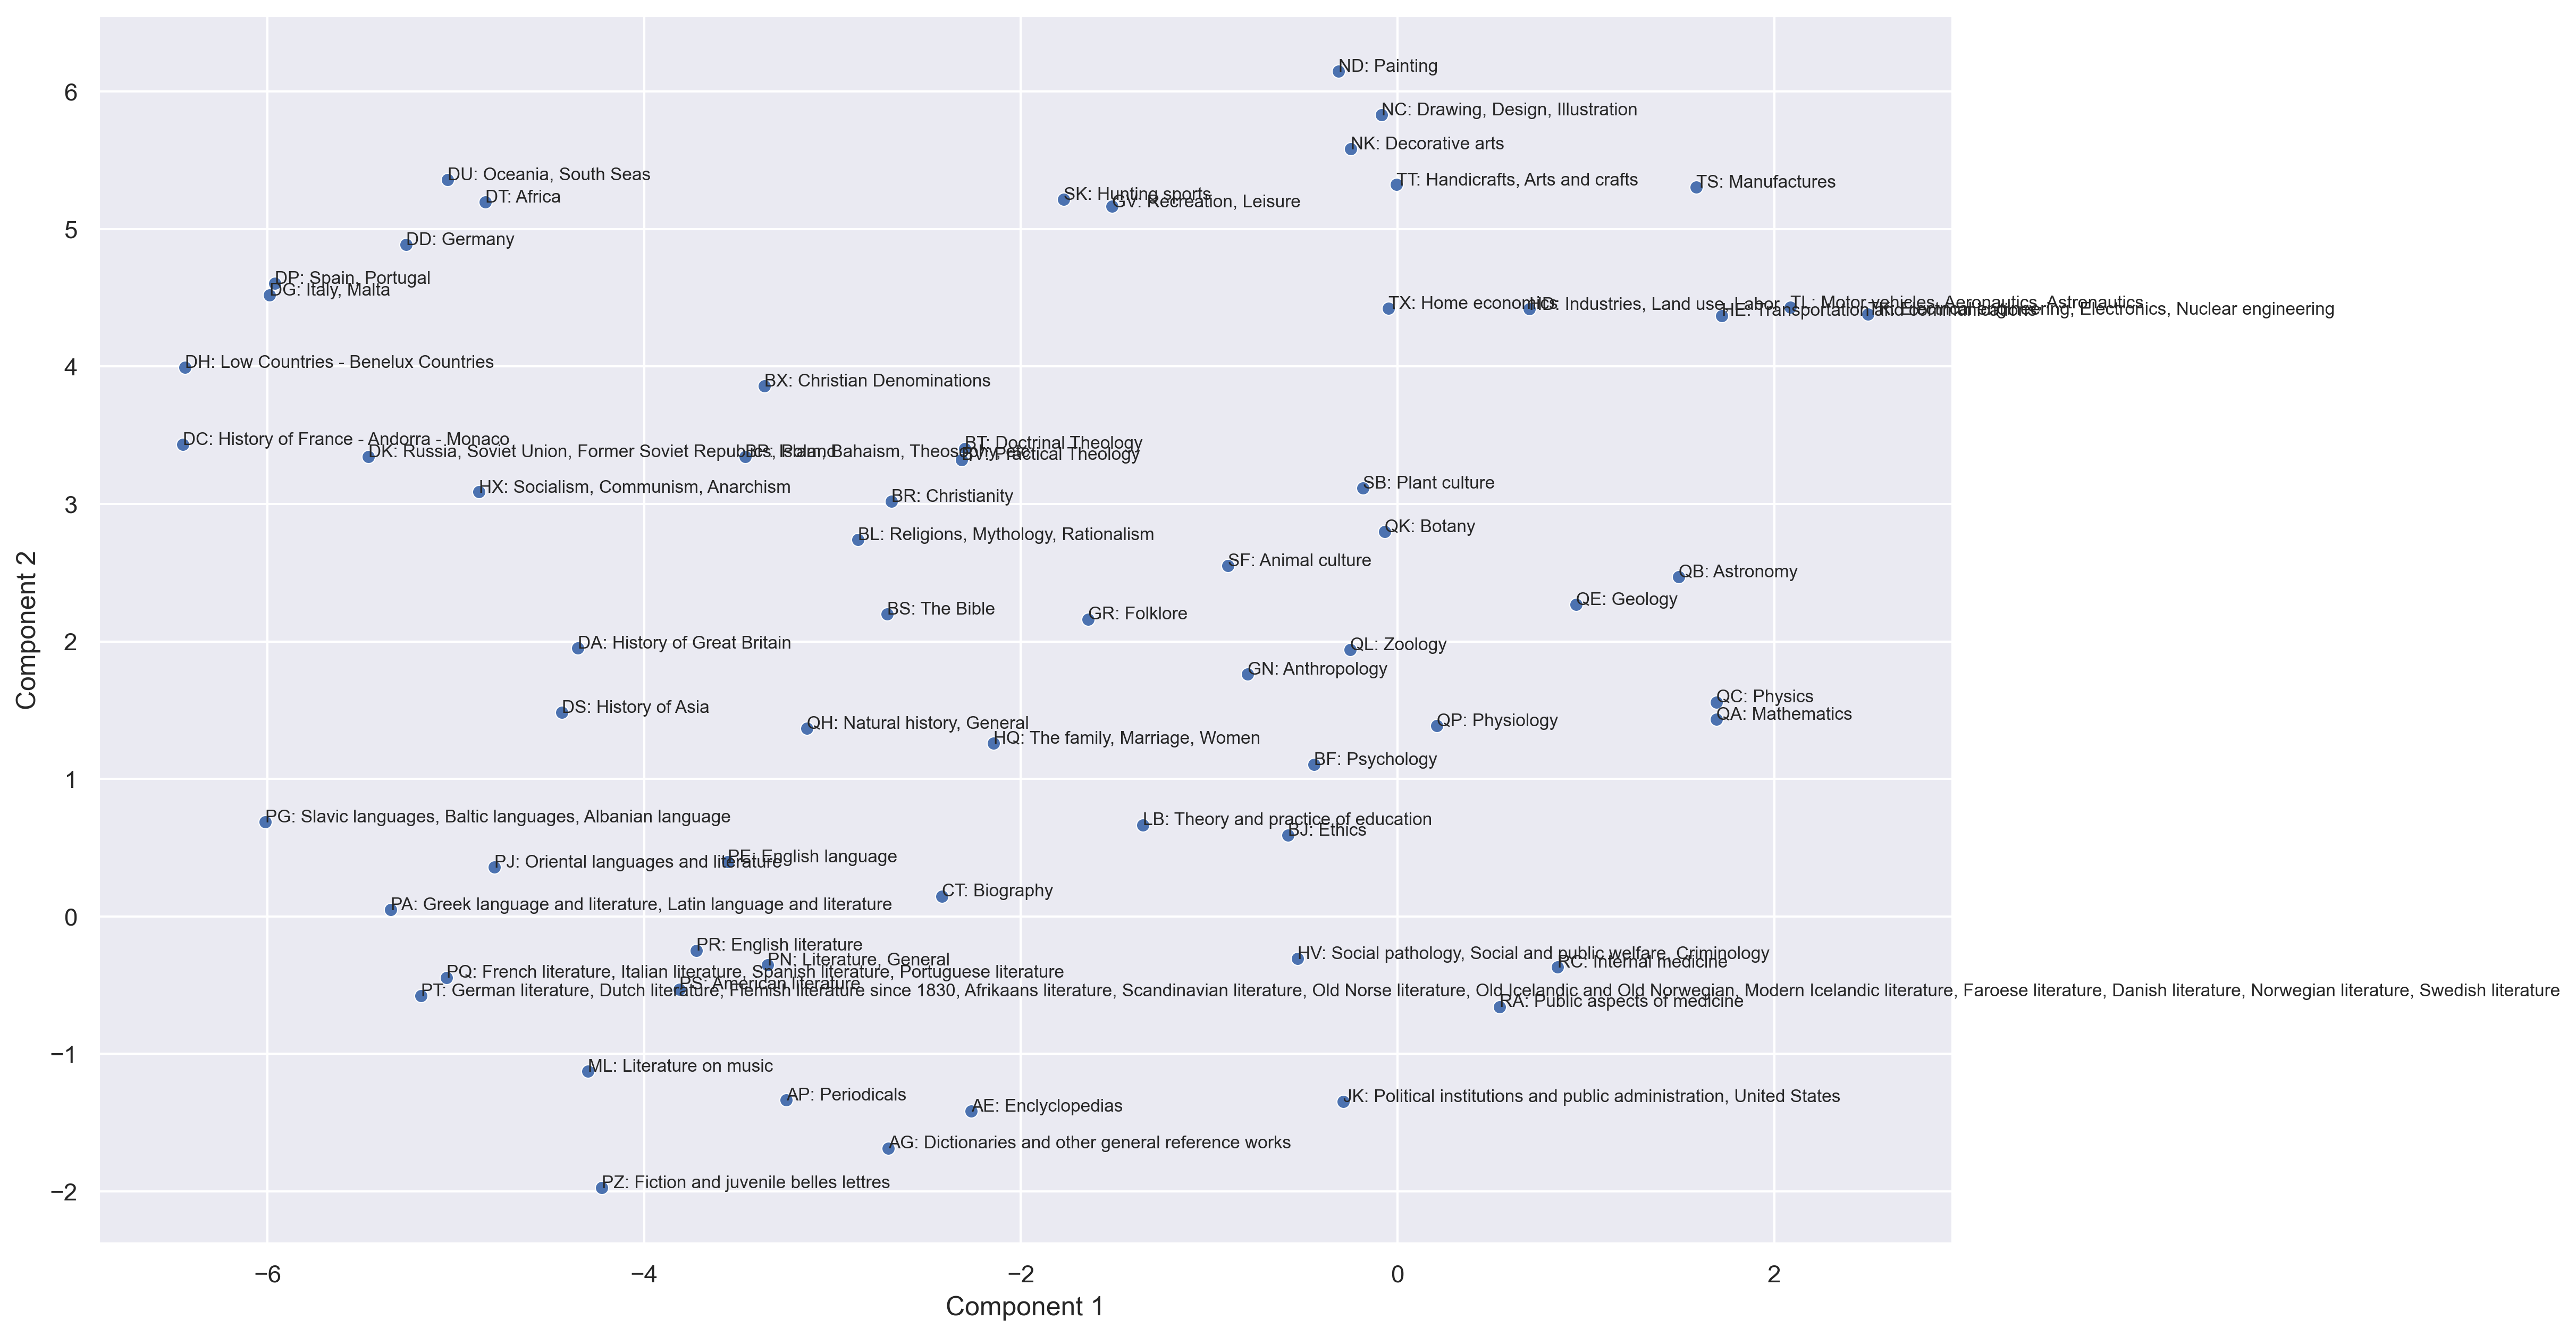

In [25]:
# Visualize the semantic similarity between category names
from sklearn.manifold import TSNE

labels = category_information['Label Abbreviation'] + ": " + category_information['Full Label']
labels = labels.tolist()
embeddings = np.array(list(category_information['Embedding']))
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(embeddings)
category_name_df = pd.DataFrame(tsne_result, columns=['Component 1', 'Component 2'])
category_name_df['Category'] = labels

plt.figure(figsize=(15, 10))
scatter_plot = sns.scatterplot(data=category_name_df, x='Component 1', y='Component 2')
for i, row in category_name_df.iterrows():
    plt.text(row['Component 1'], row['Component 2'], row['Category'], fontsize=8)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

In [27]:
# Rank the pairwise similarity between category names
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(embeddings)
pairwise_similarities = []
for i in range(len(labels)):
    for j in range(i + 1, len(labels)):
        sim = similarity_matrix[i, j]
        pairwise_similarities.append((labels[i], labels[j], sim))
pairwise_similarities.sort(key=lambda x: x[2], reverse=True)

for rank, (label1, label2, sim) in enumerate(pairwise_similarities, start=1):
    print(f"{rank}. {label1}, {label2}, Similarity: {sim:.3f}")

1. PR: English literature, PS: American literature, Similarity: 0.826
2. BT: Doctrinal Theology, BV: Practical Theology, Similarity: 0.783
3. PN: Literature, General, PR: English literature, Similarity: 0.772
4. GN: Anthropology, QL: Zoology, Similarity: 0.743
5. PQ: French literature, Italian literature, Spanish literature, Portuguese literature, PT: German literature, Dutch literature, Flemish literature since 1830, Afrikaans literature, Scandinavian literature, Old Norse literature, Old Icelandic and Old Norwegian, Modern Icelandic literature, Faroese literature, Danish literature, Norwegian literature, Swedish literature, Similarity: 0.701
6. QL: Zoology, QP: Physiology, Similarity: 0.700
7. NC: Drawing, Design, Illustration, NK: Decorative arts, Similarity: 0.685
8. PN: Literature, General, PS: American literature, Similarity: 0.673
9. QA: Mathematics, QC: Physics, Similarity: 0.664
10. NK: Decorative arts, TT: Handicrafts, Arts and crafts, Similarity: 0.660
11. PE: English langua

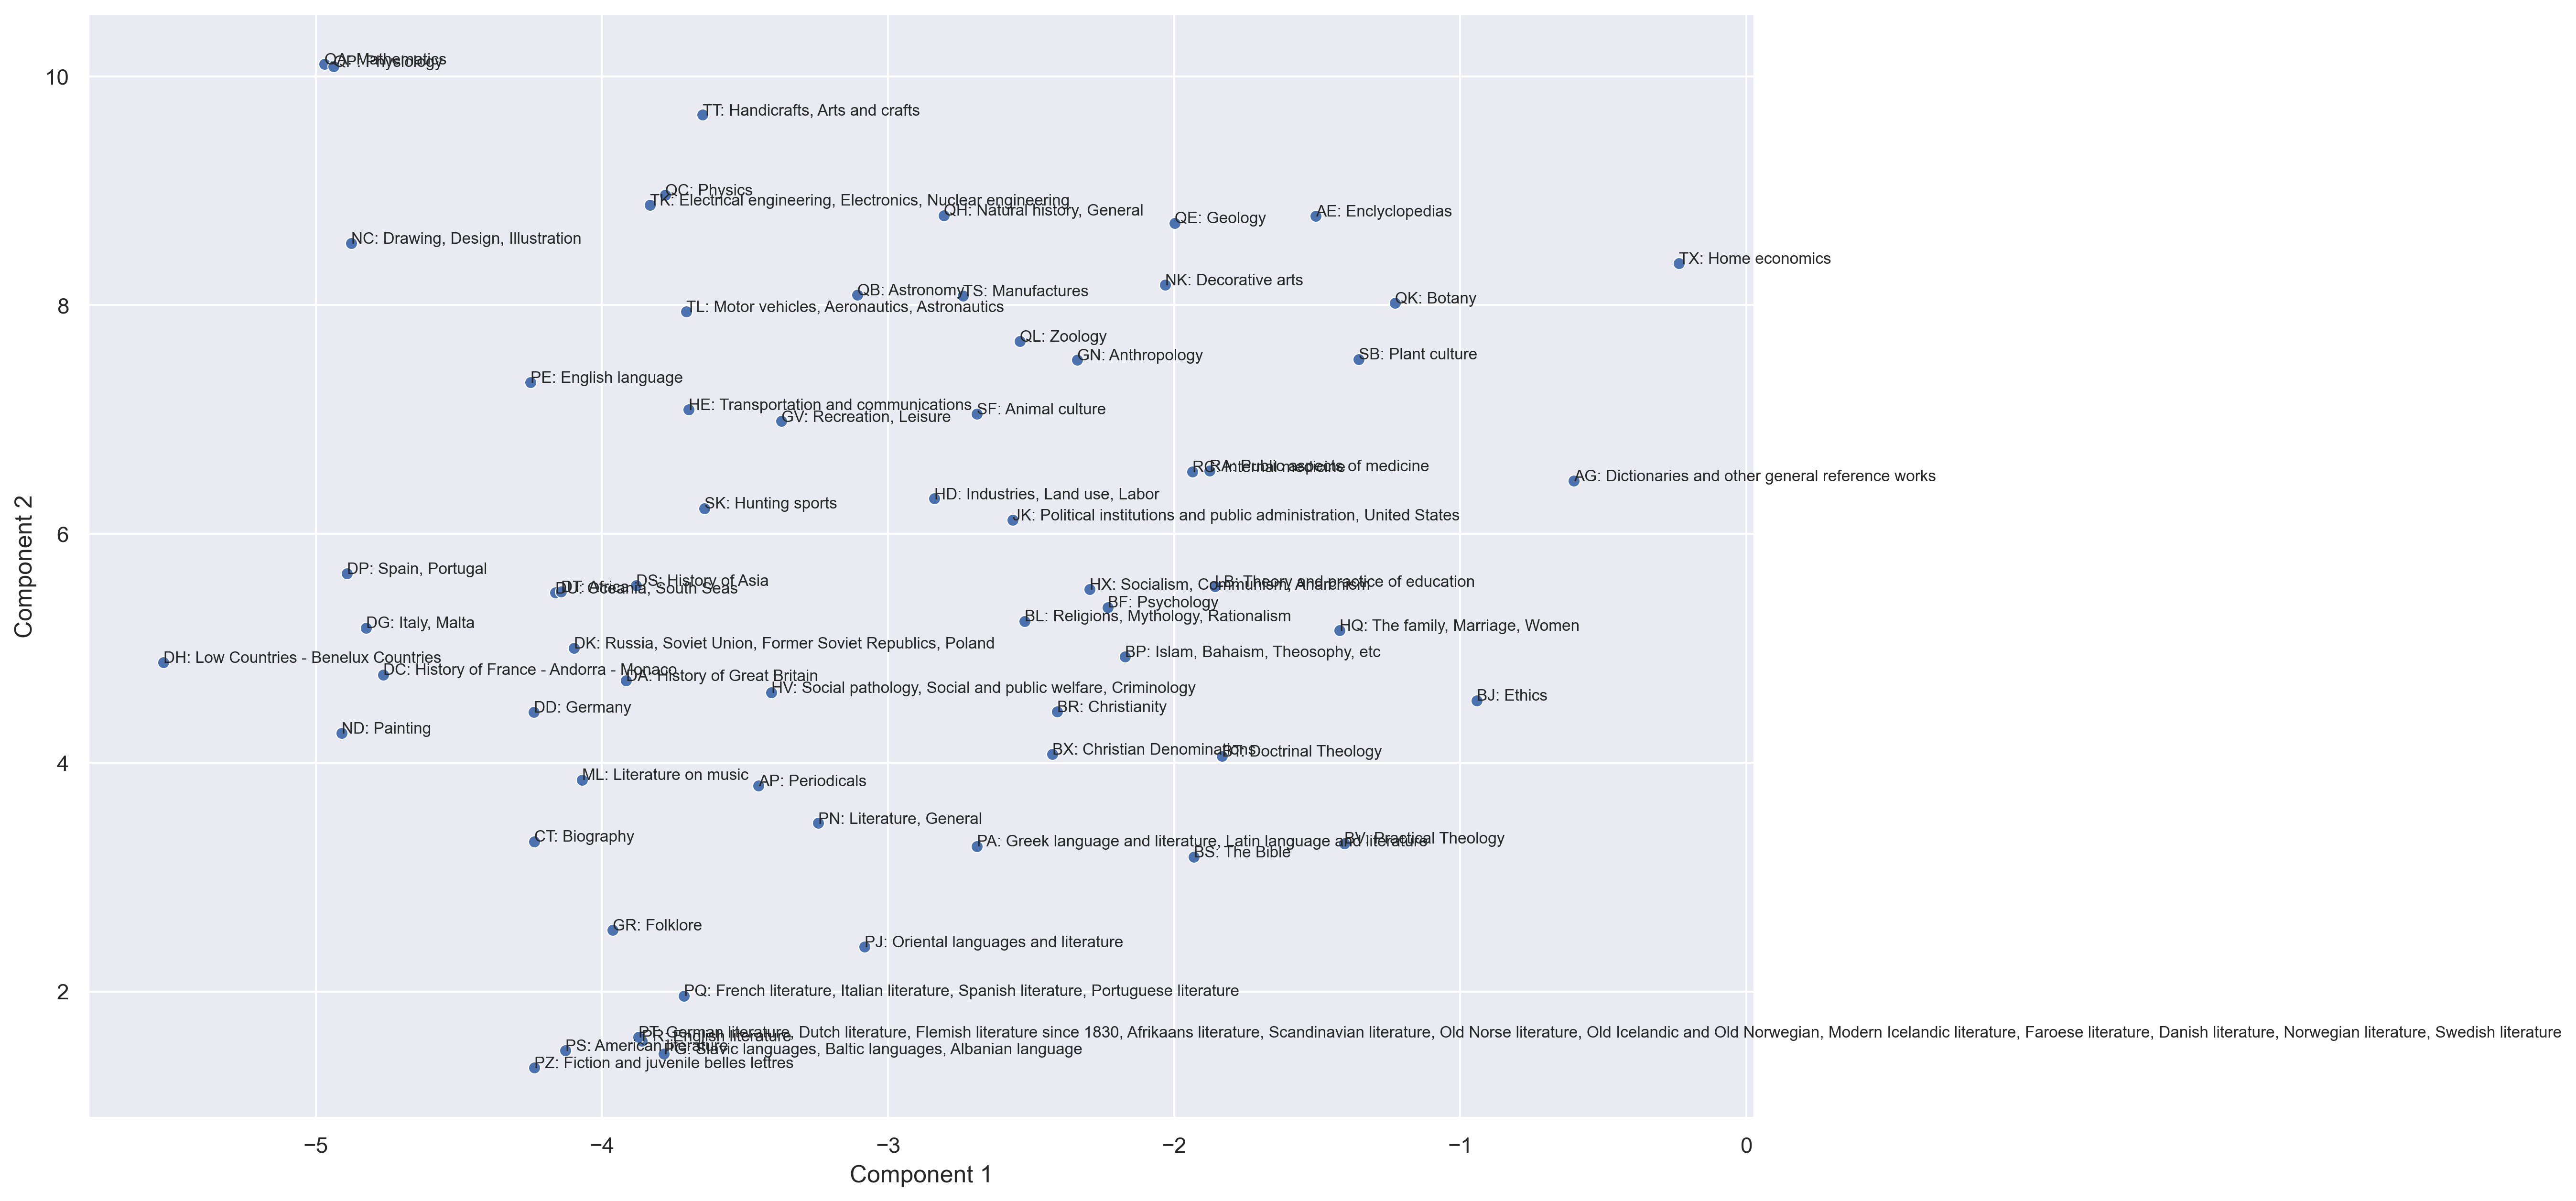

In [28]:
label_centroids = {}
for label, vectors in shared_vectorized_books.items():
    centroid = np.mean(vectors, axis=0)
    label_centroids[label] = centroid
labels = list(label_centroids.keys())
centroid_matrix = np.array([label_centroids[label] for label in labels])

# t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
centroid_2d = tsne.fit_transform(centroid_matrix)

centroid_df = pd.DataFrame(centroid_2d, columns=['Component 1', 'Component 2'])
labels = [label + ": " + label_and_name_dict[label] for label in labels]
centroid_df['Category'] = labels

plt.figure(figsize=(15, 10))
scatter_plot = sns.scatterplot(data=centroid_df, x='Component 1', y='Component 2')
for i, row in centroid_df.iterrows():
    plt.text(row['Component 1'], row['Component 2'], row['Category'], fontsize=8)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

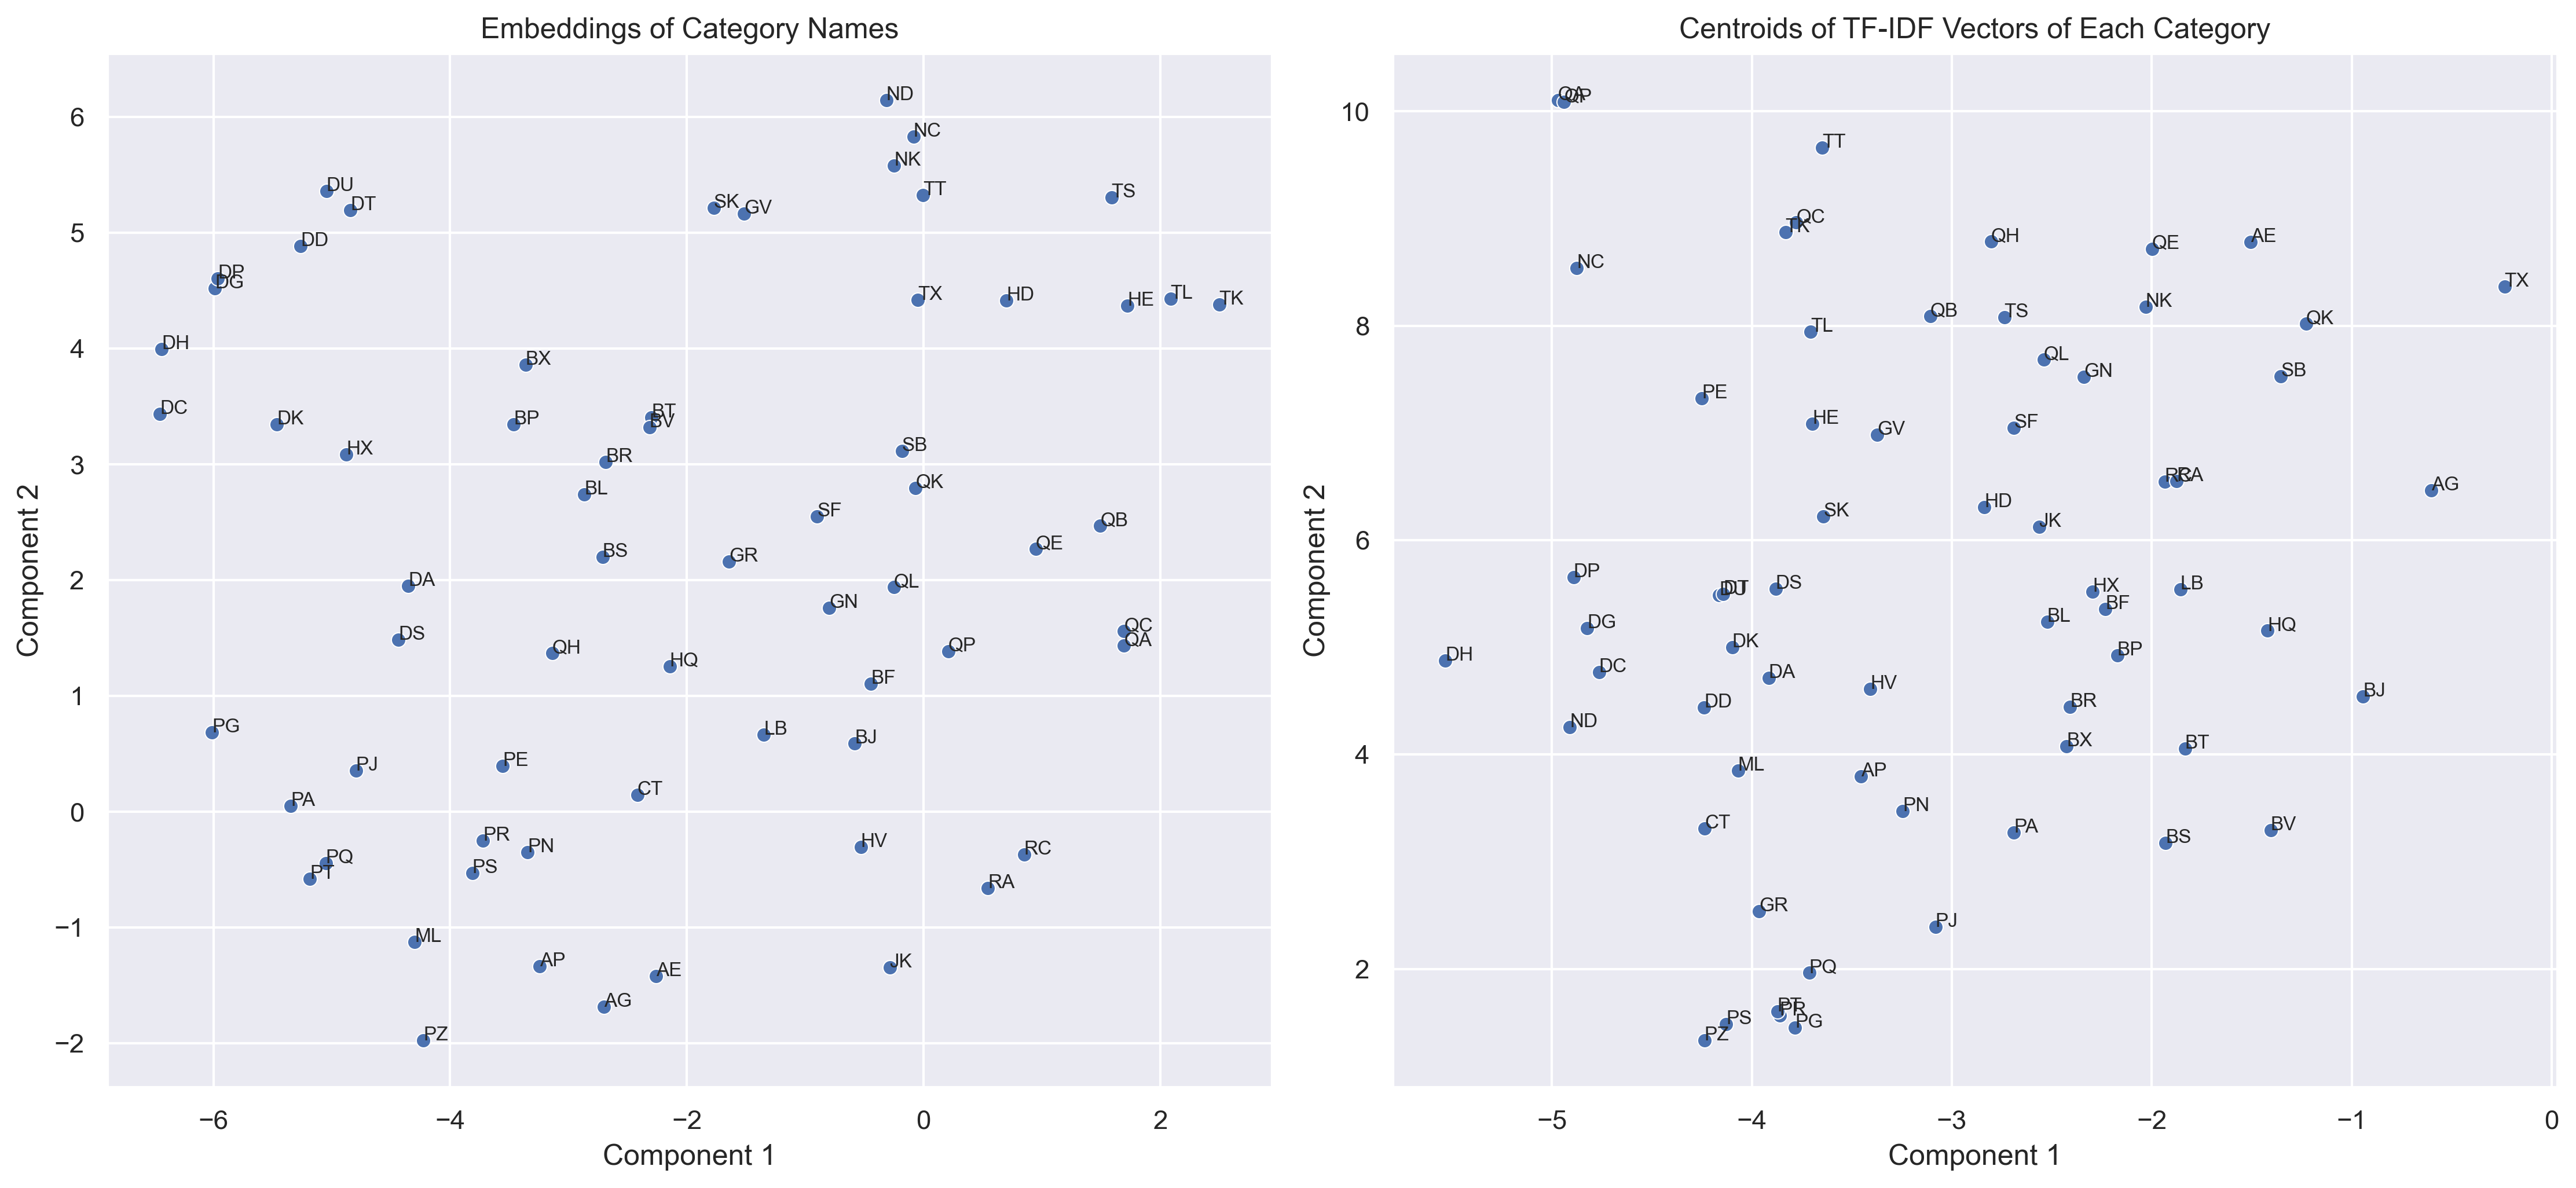

In [29]:
# Since it would be too clustered annotating full names of categories, we will likely use abbreviations only
# And use the above figures for reference to highlight some categories here
# E.g., SB (Plant Culture) and QK (Botany) are close to each other in both plots
# Also HQ (The Family, Marriage, Women) and LB (Theory and practice of education)
category_name_df['Abbreviation'] = category_name_df['Category'].str.split(':').str[0]
centroid_df['Abbreviation'] = centroid_df['Category'].str.split(':').str[0]

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.scatterplot(data=category_name_df, x='Component 1', y='Component 2', ax=axes[0])
for i, row in category_name_df.iterrows():
    axes[0].text(row['Component 1'], row['Component 2'], row['Abbreviation'], fontsize=8)
axes[0].set_title("Embeddings of Category Names")
axes[0].grid(True)

sns.scatterplot(data=centroid_df, x='Component 1', y='Component 2', ax=axes[1])
for i, row in centroid_df.iterrows():
    axes[1].text(row['Component 1'], row['Component 2'], row['Abbreviation'], fontsize=8)
axes[1].set_title("Centroids of TF-IDF Vectors of Each Category")
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [30]:
# For each pair of categories, list the semantic similarity of their names and average similarity of the TF-IDF vector of 
# each book within them
category_avg_lookup = {}
for _, row in category_similarities.iterrows():
    pair = tuple(sorted([row['Category 1'], row['Category 2']]))
    category_avg_lookup[pair] = row['Average Similarity']

name_sim_dict = {}
for cat1, cat2, sim in pairwise_similarities:
    abbr1 = cat1.split(':')[0].strip()
    abbr2 = cat2.split(':')[0].strip()
    key = tuple(sorted([abbr1, abbr2]))
    name_sim_dict[key] = sim

aligned_pairs = []
for pair, doc_sim in category_avg_lookup.items():
    if pair in name_sim_dict:
        aligned_pairs.append((pair, name_sim_dict[pair], doc_sim))

similarity_df = pd.DataFrame(aligned_pairs, columns=['Pair', 'Category Name Similarity', 'Document TFIDF Similarity'])
similarity_df

,Pair,Category Name Similarity,Document TFIDF Similarity
0,"(BS, JK)",0.056127,0.745611
1,"(JK, PR)",0.138197,0.749703
2,"(JK, PS)",0.264232,0.729638
3,"(BX, JK)",0.237563,0.823222
4,"(JK, PA)",0.059197,0.770048
...,...,...,...
2075,"(RA, TT)",0.080336,0.665737
2076,"(NK, RA)",0.132132,0.861942
2077,"(TS, TT)",0.309559,0.640203
2078,"(NK, TS)",0.252569,0.816470


In [31]:
# Statistical test: correlation between the two values (Spearman also shows no significant results)
x = similarity_df['Category Name Similarity']
y = similarity_df['Document TFIDF Similarity']
r, p = pearsonr(x, y)
print(f"Pearson correlation: r = {r:.3f}, p = {p:.3f}")

Pearson correlation: r = -0.018, p = 0.405


In [32]:
# Check subcategories in different main cateogries
filtered_df = similarity_df[similarity_df['Pair'].apply(lambda x: x[0][0] != x[1][0])].reset_index(drop=True)
filtered_df

,Pair,Category Name Similarity,Document TFIDF Similarity
0,"(BS, JK)",0.056127,0.745611
1,"(JK, PR)",0.138197,0.749703
2,"(JK, PS)",0.264232,0.729638
3,"(BX, JK)",0.237563,0.823222
4,"(JK, PA)",0.059197,0.770048
...,...,...,...
1888,"(RA, TS)",0.111573,0.840848
1889,"(RA, TT)",0.080336,0.665737
1890,"(NK, RA)",0.132132,0.861942
1891,"(NK, TS)",0.252569,0.816470


In [33]:
# Still no significant correlation
x = filtered_df['Category Name Similarity']
y = filtered_df['Document TFIDF Similarity']
r, p = pearsonr(x, y)
print(f"Pearson correlation: r = {r:.3f}, p = {p:.3f}")

Pearson correlation: r = -0.031, p = 0.177
